## Import Libraries

In [181]:
import numpy as np
import pandas as pd

## Import Data
The dataset contains all available data for more than 800,000 consumer loans issued from 2007 to 2015 by Lending Club: a large US peer-to-peer lending company. There are several different versions of this dataset. We have used a version available on kaggle.com. You can find it here: https://www.kaggle.com/wendykan/lending-club-loan-data/version/1
We divided the data into two periods because we assume that some data are available at the moment when we need to build Expected Loss models, and some data comes from applications after. Later, we investigate whether the applications we have after we built the Probability of Default (PD) model have similar characteristics with the applications we used to build the PD model.

In [182]:
loan_data_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [183]:
loan_data = loan_data_backup.copy()

## Explore Data

In [184]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [186]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
loan_data.columns.values
# Displays all column names.

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [188]:
loan_data.info()
# Displays column names, complete (non-missing) cases per column, and datatype per column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
Unnamed: 0                     466285 non-null int64
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                   

## Preprocessing - I

## Preprocessing few continuous variables

In [189]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [190]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year', '')

In [191]:
type(loan_data['emp_length_int'][0])

str

In [192]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [193]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [194]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [195]:
loan_data['term_int'] = loan_data['term'].str.replace('\+ months', '')
loan_data['term_int'] = loan_data['term'].str.replace('months', '')

In [196]:
type(loan_data['term_int'][0])

str

In [197]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [198]:
loan_data['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [199]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
loan_data['earliest_cr_line_date'] = loan_data['earliest_cr_line_date'].mask(loan_data['earliest_cr_line_date'].dt.year > 2017, 
                                         loan_data['earliest_cr_line_date'] - pd.offsets.DateOffset(years=100))

In [200]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [201]:
loan_data['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1, 'M'))

In [202]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.491078
std          86.928944
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         887.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [203]:
loan_data.loc[:, ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line


In [204]:
loan_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [205]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')
#loan_data['issue_date'] = loan_data['issue_date'].mask(loan_data['issue_date'].dt.year > 2017, loan_data['issue_date'] - pd.offsets.DateOffset(years=100))

In [206]:
loan_data['issue_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_date, dtype: datetime64[ns]

In [207]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_date']) / np.timedelta64(1, 'M')))

In [208]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

## Creating Dummy variables

In [209]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix= 'grade', prefix_sep = ":"),
                     pd.get_dummies(loan_data['sub_grade'], prefix= 'sub_grade', prefix_sep = ":"),
                     pd.get_dummies(loan_data['home_ownership'], prefix= 'home_ownership', prefix_sep = ":"),
                     pd.get_dummies(loan_data['verification_status'], prefix= 'verification_status', prefix_sep = ":"),
                     pd.get_dummies(loan_data['loan_status'], prefix= 'loan_status', prefix_sep = ":"),
                     pd.get_dummies(loan_data['purpose'], prefix= 'purpose', prefix_sep = ":"),
                     pd.get_dummies(loan_data['addr_state'], prefix= 'addr_state', prefix_sep = ":"),
                     pd.get_dummies(loan_data['initial_list_status'], prefix= 'initial_list_status', prefix_sep = ":")]

In [210]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [211]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [212]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [213]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=207)

## Checking for missing values

In [214]:
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [215]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace = True) 
loan_data['acc_now_delinq'].fillna(0, inplace = True) 
loan_data['total_acc'].fillna(0, inplace = True) 
loan_data['pub_rec'].fillna(0, inplace = True) 
loan_data['open_acc'].fillna(0, inplace = True) 
loan_data['inq_last_6mths'].fillna(0, inplace = True) 
loan_data['delinq_2yrs'].fillna(0, inplace = True) 
loan_data['emp_length_int'].fillna(0, inplace = True) 

## Defining Dependent variable

### Good/bad(default) definition, Default and non-default accounts

In [216]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [217]:
loan_data['loan_status'].value_counts()/loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [218]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                                   'Does not meet the credit policy. Status:Charged Off',
                                                                   'Late (31-120 days)']), 0, 1)

In [219]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

## Train/Test Split

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

## Weight of Evidence Calculation

Since data preparation binning will be same for both training and test data, combining both dataframes to a list so that changes can be applied uniformly.

In [222]:
data_cleaner = [loan_data_inputs_train, loan_data_inputs_test]

### Weight of Evidence Calculation for 1 variable

In [223]:
loan_data_inputs_train['grade'].unique()

array(['A', 'C', 'D', 'B', 'E', 'F', 'G'], dtype=object)

In [224]:
df1 = pd.concat([loan_data_inputs_train['grade'], loan_data_targets_train], axis = 1)

In [225]:
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,0


In [226]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,59759
1,B,109730
2,C,100245
3,D,61498
4,E,28612
5,F,10530
6,G,2654


In [227]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.961044
1,B,0.921015
2,C,0.885770
3,D,0.846304
4,E,0.805257
5,F,0.754416
6,G,0.727958


In [228]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()], axis = 1)

In [229]:
df1.head()

,grade,good_bad,grade,good_bad
0,A,59759,A,0.961044
1,B,109730,B,0.921015
2,C,100245,C,0.885770
3,D,61498,D,0.846304
4,E,28612,E,0.805257


In [230]:
df1 = df1.iloc[: , [0, 1, 3]]

In [231]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']

In [232]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']

In [233]:
df1.head()

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0
1,B,109730,0.921015,0.294160,101063.0,8667.0
2,C,100245,0.885770,0.268733,88794.0,11451.0
3,D,61498,0.846304,0.164862,52046.0,9452.0
4,E,28612,0.805257,0.076702,23040.0,5572.0


In [234]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [235]:
df1.head()

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642


In [236]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])

In [237]:
df1.head()

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830
1,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476
2,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267


In [238]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)

In [239]:
df1.head()

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503


Calculating the diff in proportion of good/bad as we move across categories

In [240]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()

In [241]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353


In [242]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()

In [243]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Automating WOE calculation

In [244]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[: , [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return(df)

In [245]:
df_temp = woe_discrete(loan_data_inputs_train, 'grade', loan_data_targets_train)

In [246]:
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2654,0.727958,0.007115,1932.0,722.0,0.005815,0.017706,-1.113459,NaN,NaN,0.288636
1,F,10530,0.754416,0.028228,7944.0,2586.0,0.023910,0.063417,-0.975440,0.026458,0.138019,0.288636
2,E,28612,0.805257,0.076702,23040.0,5572.0,0.069345,0.136642,-0.678267,0.050841,0.297173,0.288636
3,D,61498,0.846304,0.164862,52046.0,9452.0,0.156647,0.231792,-0.391843,0.041047,0.286424,0.288636
4,C,100245,0.885770,0.268733,88794.0,11451.0,0.267251,0.280813,-0.049503,0.039466,0.342340,0.288636
5,B,109730,0.921015,0.294160,101063.0,8667.0,0.304178,0.212541,0.358476,0.035245,0.407979,0.288636
6,A,59759,0.961044,0.160200,57431.0,2328.0,0.172855,0.057090,1.107830,0.040028,0.749353,0.288636


### Preprocessing discrete variables: Visualising results

In [247]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [248]:
def plot_by_woe(df_WOE, rotation_of_xaxis_labels = 90):
    # reading the first column from the WOE dataset, and coercing to string
    x = np.array(df_WOE.iloc[:, 0].apply(str))
    y = df_WOE['WoE']
    plt.figure(figsize = (18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WOE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title('Weight of Evidence by' + df_WOE.columns[0])
    plt.xticks(rotation = rotation_of_xaxis_labels)

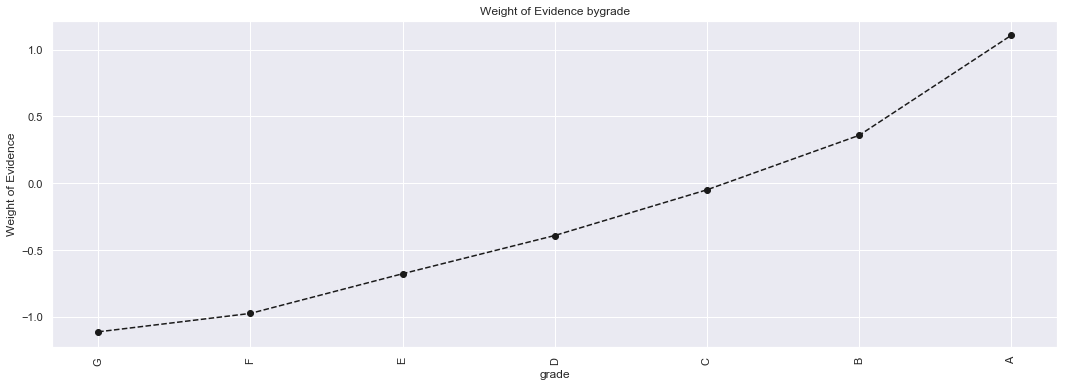

In [249]:
plot_by_woe(df_temp)

### Preprocessing Discrete Variables: Creating dummy variables, Part 1

In [250]:
df_temp = woe_discrete(loan_data_inputs_train, 'home_ownership', loan_data_targets_train)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,137,0.795620,0.000367,109.0,28.0,0.000328,0.000687,-0.738602,NaN,NaN,inf
1,NONE,40,0.850000,0.000107,34.0,6.0,0.000102,0.000147,-0.363144,0.054380,0.375458,inf
2,RENT,150599,0.873870,0.403720,131604.0,18995.0,0.396099,0.465815,-0.162123,0.023870,0.201021,inf
3,OWN,33295,0.892536,0.089256,29717.0,3578.0,0.089442,0.087743,0.019170,0.018666,0.181294,inf
4,MORTGAGE,188956,0.903835,0.506546,170785.0,18171.0,0.514026,0.445608,0.142834,0.011298,0.123663,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.096165,inf,inf


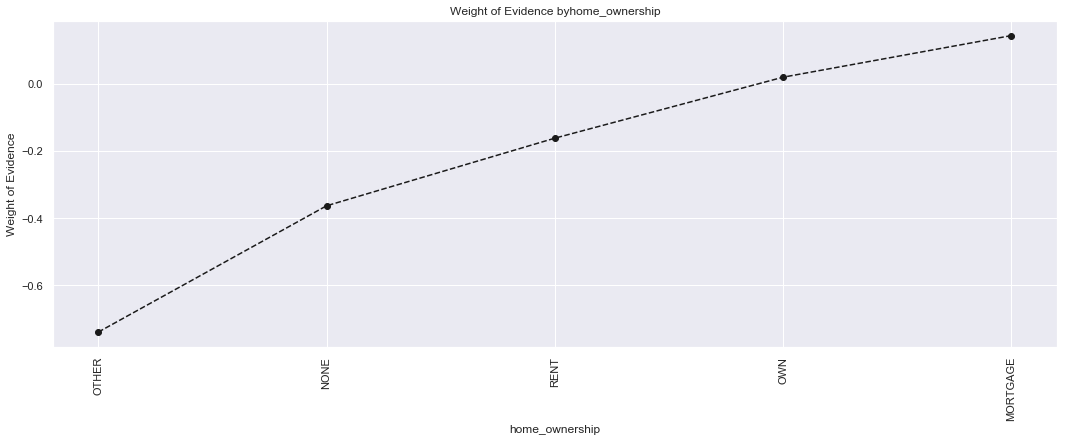

In [251]:
plot_by_woe(df_temp)

Other, none and any categories represent very few observations. We combine them to not lose the info they bring. Combining underrepresented categories. They are combined w/ the riskiest category w/ enough number of observations. In this case: rent

In [252]:
for dataset in data_cleaner:  
    dataset['home_ownership:RENT_OTHER_ANY_NONE'] = sum([dataset['home_ownership:RENT'], 
                                                            dataset['home_ownership:OTHER'], 
                                                            dataset['home_ownership:ANY'],
                                                            dataset['home_ownership:NONE']])

#### Address State

In [253]:
loan_data_inputs_train['addr_state'].unique()

array(['SC', 'NJ', 'GA', 'MA', 'CA', 'IL', 'NC', 'NY', 'TX', 'CT', 'FL',
       'VA', 'UT', 'AZ', 'MD', 'WI', 'MI', 'CO', 'TN', 'IN', 'AL', 'NV',
       'MT', 'RI', 'OR', 'MN', 'KS', 'AK', 'PA', 'OH', 'WA', 'KY', 'OK',
       'MO', 'NM', 'HI', 'WV', 'LA', 'VT', 'AR', 'DC', 'SD', 'NH', 'WY',
       'MS', 'DE', 'IA', 'NE', 'ID', 'ME'], dtype=object)

In [254]:
df_temp = woe_discrete(loan_data_inputs_train, 'addr_state', loan_data_targets_train )
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.461538,0.000035,6.0,7.0,0.000018,0.000172,-2.251896,NaN,NaN,inf
1,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000074,-0.893772,0.307692,1.358123,inf
2,NV,5221,0.864585,0.013996,4514.0,707.0,0.013586,0.017338,-0.243837,0.095355,0.649935,inf
3,FL,25211,0.875808,0.067585,22080.0,3131.0,0.066456,0.076782,-0.144425,0.011223,0.099411,inf
4,HI,2001,0.877061,0.005364,1755.0,246.0,0.005282,0.006033,-0.132852,0.001253,0.011573,inf
5,AL,4671,0.877328,0.012522,4098.0,573.0,0.012334,0.014052,-0.130376,0.000267,0.002476,inf
6,NM,2075,0.883373,0.005563,1833.0,242.0,0.005517,0.005935,-0.072973,0.006045,0.057403,inf
7,VA,11366,0.883864,0.030470,10046.0,1320.0,0.030236,0.032370,-0.068202,0.000491,0.004771,inf
8,NY,32211,0.883984,0.086350,28474.0,3737.0,0.085701,0.091643,-0.067037,0.000120,0.001165,inf
9,OK,3284,0.884287,0.008804,2904.0,380.0,0.008740,0.009319,-0.064072,0.000304,0.002965,inf


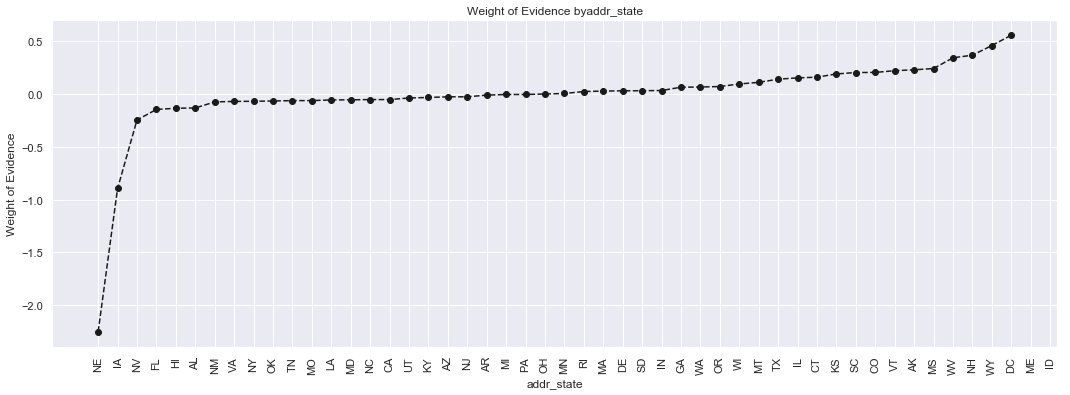

In [255]:
plot_by_woe(df_temp)

There are fewer than 50 states in the results. There are no borrowers from 1 of the states. (North Dakota)

In [256]:
for dataset in data_cleaner: 
    if ['addr_state:ND'] in dataset.columns.values:
        pass
    else:
        dataset['addr_state:ND'] = 0

Weight of evidence is not calculated for 2 states. There are no bads. The first two states have very few observations. These can be clubbed w/ the next riskiest category

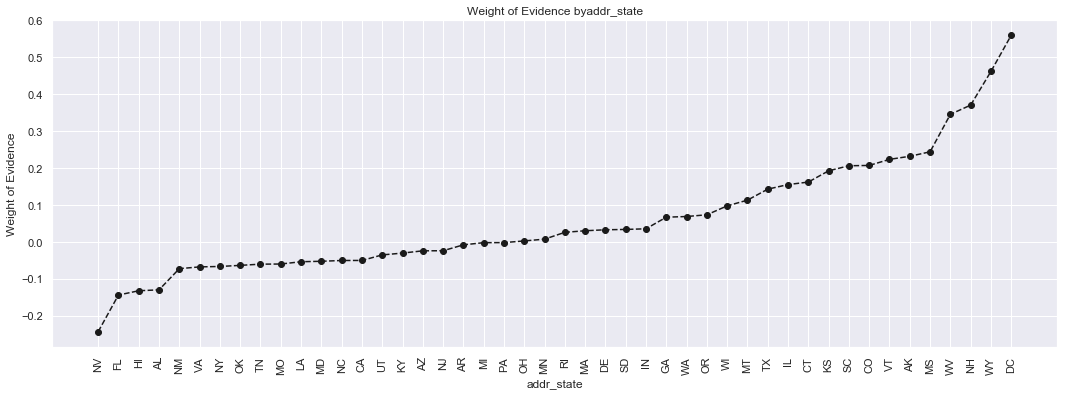

In [257]:
plot_by_woe(df_temp.iloc[2: -2, :])

Nevada has a lower WOE than the states after. It could be clubbed with the low proportion states we had excluded. The state with no records (North Dakota) can be included here. This would be a conservative approach to take. For states with unknown values, assignin them the worst WOE value. The first dummy variable will include NE, IA, NV, FL, HI and AL. The states at the end will include WV, NH, WY, DC, ME and ID. Plotting the remaining states: 


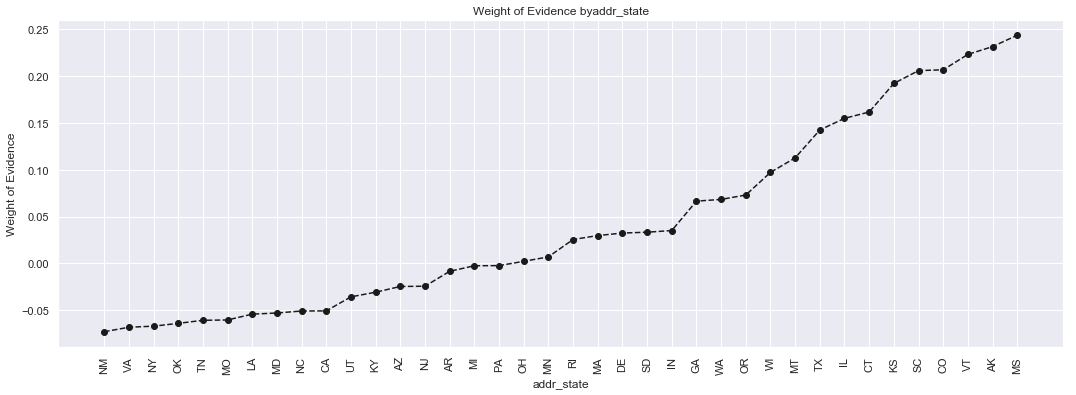

In [258]:
plot_by_woe(df_temp.iloc[6: -6, :])

NY and CA have the highest number of observations. Most borrowers. These can be in a separate category dummy of their own. 
The other states can be in one category/ grouped together. But leaving out NY and CA because these need to be in a separate category. 

NM and VA could be combined
OK, TN, MO, LA, MD, NC could be combined to one. 
These can't be combined together because they are separated by NY. (10% of observations come from NY)

UT, KY, AZ and NJ can be comibined into one category. They have similar WOE and neither has very high number of values. 

AR, MI, PA, OH and MN have similar WOE. RI, MA, DE, SD and IN belong to one category. 
GA, WA and OR belong together. WI and MT need to be combined.

TX, IL and CT. have similar WOE but Texas has too many values. It can stay a separate category. 
IL and CT can be combined

KS, SC, CO, VT, AK and MS combined into one category
They have very high WOE but too few observations. This makes WoE less reliable. They can be combined together.

In [259]:
for dataset in data_cleaner: 
    dataset['addr_state:NE_IA_NV_FL_HI_AL'] = sum([dataset['addr_state:NE'], dataset['addr_state:IA'],
                                                     dataset['addr_state:NV'], dataset['addr_state:FL'], 
                                                     dataset['addr_state:HI'], dataset['addr_state:AL']])
    
    dataset['addr_state:NM_VA'] = sum([dataset['addr_state:NM'], dataset['addr_state:VA']])
    
    dataset['addr_state:OK_TN_MO_LA_MD_NC'] = sum([dataset['addr_state:OK'], dataset['addr_state:TN'],
                                                     dataset['addr_state:MO'], dataset['addr_state:LA'], 
                                                     dataset['addr_state:MD'], dataset['addr_state:NC']])
    
    dataset['addr_state:UT_KY_AZ_NJ'] = sum([dataset['addr_state:UT'], dataset['addr_state:KY'],
                                                     dataset['addr_state:AZ'], dataset['addr_state:NJ']])
    
    dataset['addr_state:AR_MI_PA_OH_MN']= sum([dataset['addr_state:AR'], dataset['addr_state:MI'],
                                                  dataset['addr_state:PA'], dataset['addr_state:OH'], 
                                                  dataset['addr_state:MN']])
    
    dataset['addr_state:RI_MA_DE_SD_IN']= sum([dataset['addr_state:RI'], dataset['addr_state:MA'],
                                                  dataset['addr_state:DE'], dataset['addr_state:SD'],
                                                  dataset['addr_state:IN']])
    
    dataset['addr_state:GA_WA_OR'] = sum([dataset['addr_state:GA'], dataset['addr_state:WA'], 
                                          dataset['addr_state:OR']])
    
    dataset['addr_state:WI_MT'] = sum([dataset['addr_state:WI'], dataset['addr_state:MT']])
    
    dataset['addr_state:IL_CT'] = sum([dataset['addr_state:IL'], dataset['addr_state:CT']])
    
    dataset['addr_state:KS_SC_CO_VT_AK_MS'] = sum([dataset['addr_state:KS'], dataset['addr_state:SC'],
                                                     dataset['addr_state:CO'], dataset['addr_state:VT'], 
                                                     dataset['addr_state:AK'], dataset['addr_state:MS']])
    
    dataset['addr_state:WV_NH_WY_DC_ME_ID'] = sum([dataset['addr_state:WV'], dataset['addr_state:NH'],
                                                     dataset['addr_state:WY'], dataset['addr_state:DC'], 
                                                     dataset['addr_state:ME'], dataset['addr_state:ID']])

#### verification_status

In [260]:
loan_data_inputs_train['verification_status'].unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [261]:
df_temp = woe_discrete(loan_data_inputs_train, 'verification_status', loan_data_targets_train)

In [262]:
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134414,0.872781,0.360332,117314.0,17100.0,0.353090,0.419344,-0.171969,NaN,NaN,0.020384
1,Source Verified,120030,0.895918,0.321772,107537.0,12493.0,0.323663,0.306366,0.054922,0.023137,0.226891,0.020384
2,Not Verified,118584,0.905679,0.317896,107399.0,11185.0,0.323248,0.274290,0.164232,0.009761,0.109311,0.020384


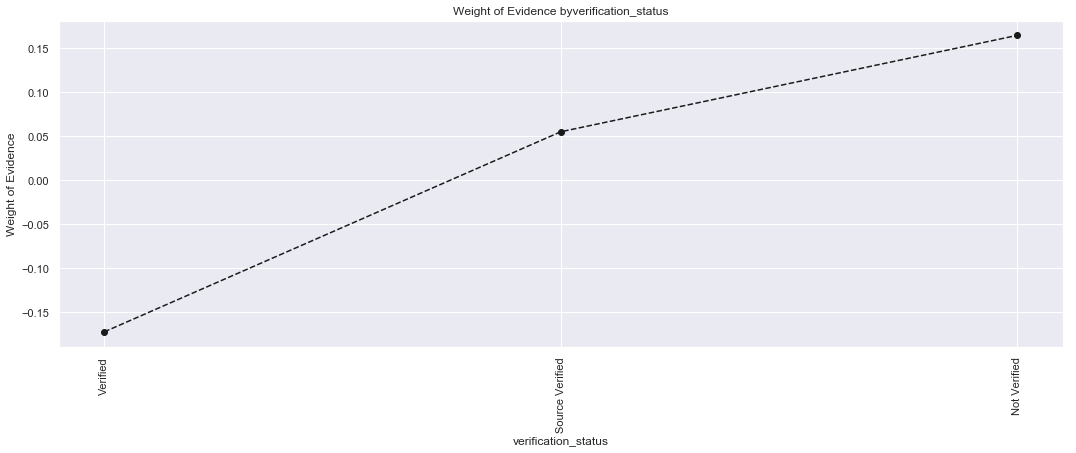

In [263]:
plot_by_woe(df_temp)

The WOE of all these values is sufficiently different. All categories have enough observations. This variable can remain as is. The lowest WOE belongs to verified. That can become the reference category

#### purpose

In [264]:
loan_data_inputs_train['purpose'].unique()

array(['debt_consolidation', 'educational', 'other', 'home_improvement',
       'credit_card', 'major_purchase', 'wedding', 'small_business',
       'vacation', 'house', 'car', 'moving', 'renewable_energy',
       'medical'], dtype=object)

In [265]:
df_temp = woe_discrete(loan_data_inputs_train, 'purpose', loan_data_targets_train)

In [266]:
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,5582,0.786098,0.014964,4388.0,1194.0,0.013207,0.029280,-0.796180,NaN,NaN,0.035418
1,educational,333,0.801802,0.000893,267.0,66.0,0.000804,0.001619,-0.700151,0.015704,0.096029,0.035418
2,moving,2392,0.839465,0.006412,2008.0,384.0,0.006044,0.009417,-0.443493,0.037663,0.256658,0.035418
3,house,1830,0.860109,0.004906,1574.0,256.0,0.004737,0.006278,-0.281547,0.020644,0.161946,0.035418
4,other,18884,0.862264,0.050624,16283.0,2601.0,0.049008,0.063784,-0.263519,0.002155,0.018028,0.035418
5,renewable_energy,281,0.864769,0.000753,243.0,38.0,0.000731,0.000932,-0.242270,0.002504,0.021250,0.035418
6,medical,3684,0.868350,0.009876,3199.0,485.0,0.009628,0.011894,-0.211300,0.003581,0.030969,0.035418
7,wedding,1887,0.881823,0.005059,1664.0,223.0,0.005008,0.005469,-0.087937,0.013473,0.123363,0.035418
8,vacation,1991,0.882471,0.005337,1757.0,234.0,0.005288,0.005738,-0.081703,0.000648,0.006234,0.035418
9,debt_consolidation,219183,0.886884,0.587578,194390.0,24793.0,0.585071,0.607999,-0.038440,0.004413,0.043263,0.035418


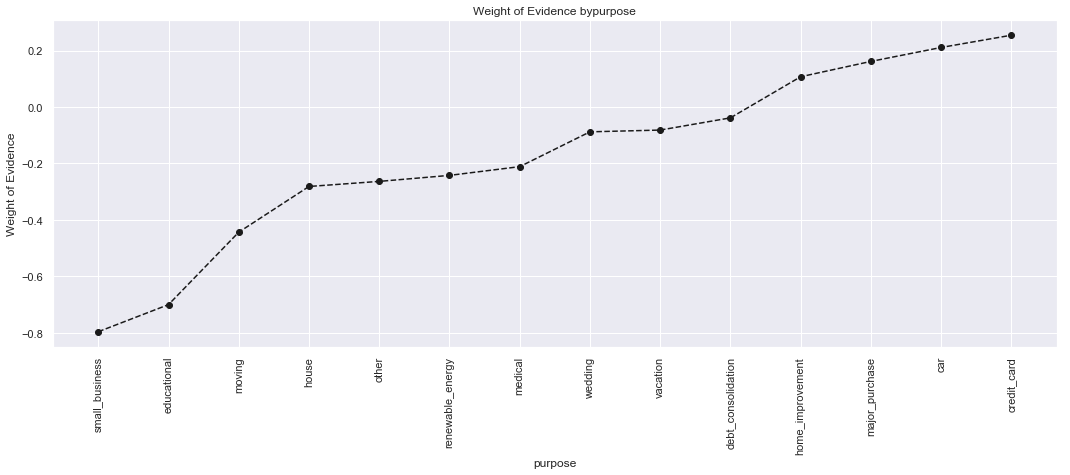

In [267]:
plot_by_woe(df_temp)

Debt consolidation and credit card can remain a separate value. It has too many values. 


In [268]:
#dataset['purpose:debt_consolidation']
#dataset['purpose:credit_card']
for dataset in data_cleaner: 
    dataset['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([dataset['purpose:educational'], 
                                                                       dataset['purpose:small_business'],
                                                                       dataset['purpose:wedding'], 
                                                                       dataset['purpose:renewable_energy'],
                                                                       dataset['purpose:moving'], 
                                                                       dataset['purpose:house']])
    dataset['purpose:oth__med__vacation'] = sum([dataset['purpose:other'], 
                                                     dataset['purpose:medical'],
                                                     dataset['purpose:vacation']])
    dataset['purpose:major_purch__car__home_impr'] = sum([dataset['purpose:major_purchase'],
                                                              dataset['purpose:car'],
                                                              dataset['purpose:home_improvement']])

#### initial_list_status

In [269]:
loan_data_inputs_train['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

In [270]:
df_temp = woe_discrete(loan_data_inputs_train, 'initial_list_status', loan_data_targets_train)

In [271]:
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242514,0.879694,0.650123,213338.0,29176.0,0.642101,0.715484,-0.108214,NaN,NaN,0.02478
1,w,130514,0.911105,0.349877,118912.0,11602.0,0.357899,0.284516,0.229461,0.031412,0.337675,0.02478


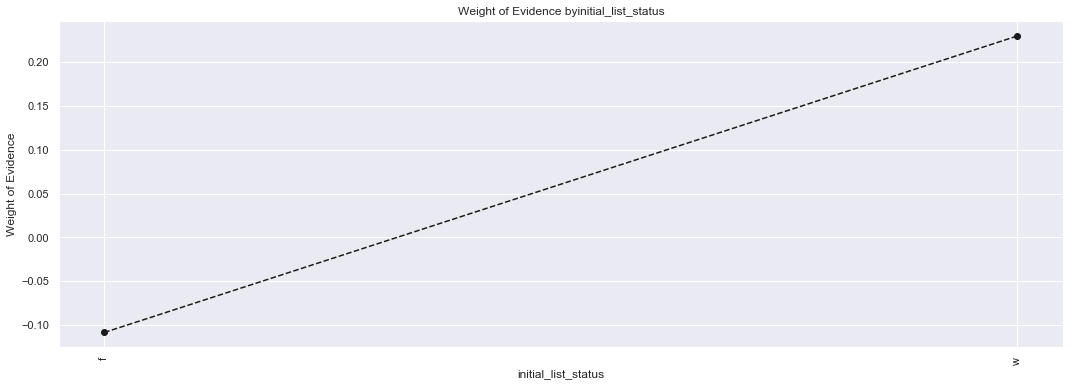

In [272]:
plot_by_woe(df_temp)

There are only 2 categories and they both bins have enough values- no need to combine these. 

### Preprocessing Continuous Variables: Automating Calculations and Visualizing Results

In [273]:
def woe_ordered_continuous(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Preprocessing Continuous Variables: Creating Dummy Variables

#### Term

In [274]:
loan_data_inputs_train['term_int'].unique()

array([36, 60], dtype=int64)

In [275]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'term_int', loan_data_targets_train)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270419,0.902995,0.724929,244187.0,26232.0,0.73495,0.643288,0.133209,NaN,NaN,0.039434
1,60,102609,0.858239,0.275071,88063.0,14546.0,0.26505,0.356712,-0.297009,0.044756,0.430218,0.039434


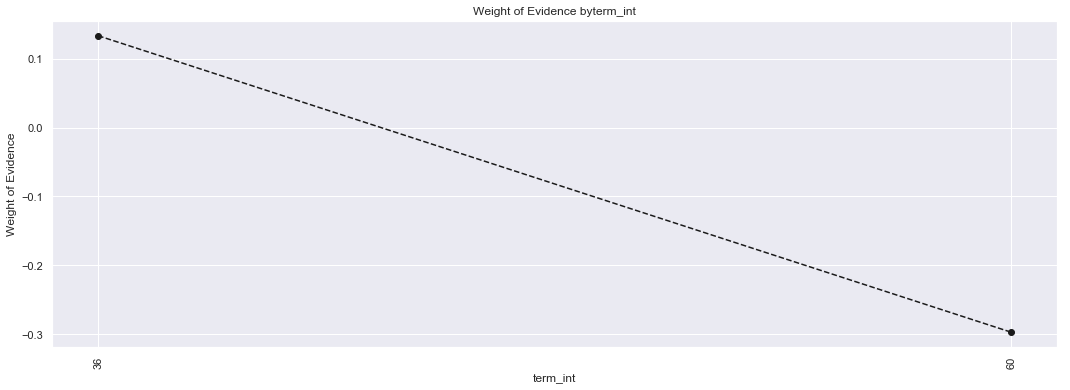

In [276]:
plot_by_woe(df_temp)

In [277]:
for dataset in data_cleaner:
    dataset['term:36'] = np.where((dataset['term_int'] == 36), 1, 0)
    dataset['term:60'] = np.where((dataset['term_int'] == 60), 1, 0)

#### Employment Length

In [278]:
loan_data_inputs_train['emp_length_int'].unique()

array([ 3.,  6., 10.,  7.,  5.,  0.,  2.,  9.,  1.,  8.,  4.])

In [279]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'emp_length_int', loan_data_targets_train)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,45720,0.876400,0.122565,40069.0,5651.0,0.120599,0.138580,-0.138975,NaN,NaN,0.006506
1,1.0,23654,0.886996,0.063411,20981.0,2673.0,0.063148,0.065550,-0.037329,0.010596,0.101645,0.006506
2,2.0,33078,0.890955,0.088674,29471.0,3607.0,0.088701,0.088455,0.002785,0.003959,0.040114,0.006506
3,3.0,29205,0.890772,0.078292,26015.0,3190.0,0.078299,0.078228,0.000907,0.000183,0.001878,0.006506
4,4.0,22468,0.890644,0.060231,20011.0,2457.0,0.060229,0.060253,-0.000404,0.000128,0.001311,0.006506
5,5.0,24602,0.884725,0.065952,21766.0,2836.0,0.065511,0.069547,-0.059790,0.005920,0.059387,0.006506
6,6.0,20887,0.883899,0.055993,18462.0,2425.0,0.055567,0.059468,-0.067862,0.000826,0.008071,0.006506
7,7.0,21049,0.887453,0.056427,18680.0,2369.0,0.056223,0.058095,-0.032759,0.003554,0.035102,0.006506
8,8.0,17853,0.889878,0.047860,15887.0,1966.0,0.047816,0.048212,-0.008245,0.002425,0.024515,0.006506
9,9.0,14267,0.886662,0.038246,12650.0,1617.0,0.038074,0.039654,-0.040660,0.003217,0.032416,0.006506


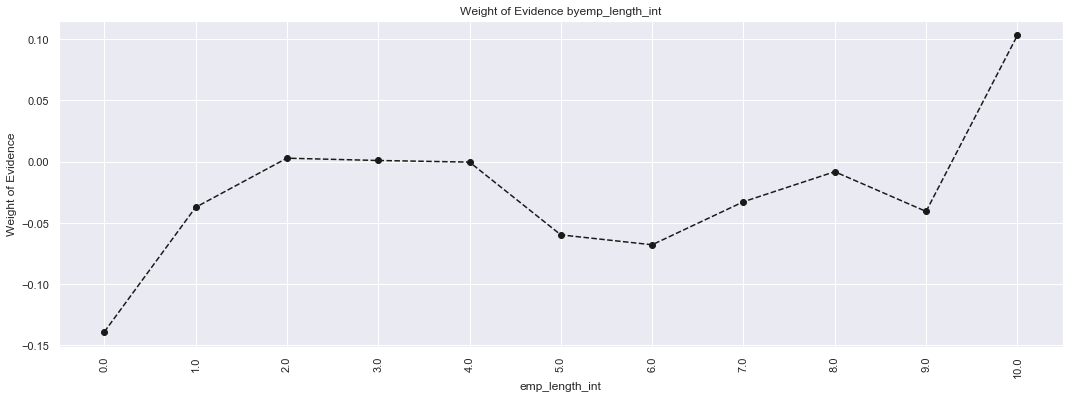

In [280]:
plot_by_woe(df_temp)

0 years of emplyment can be separate category. 1 year of employment
2-4
5-6
7-9
10

In [281]:
for dataset in data_cleaner: 
    dataset['emp_length:0'] = np.where(dataset['emp_length_int'].isin([0]), 1, 0)
    dataset['emp_length:1'] = np.where(dataset['emp_length_int'].isin([1]), 1, 0)
    dataset['emp_length:2-4'] = np.where(dataset['emp_length_int'].isin(range(2, 5)), 1, 0)
    dataset['emp_length:5-6'] = np.where(dataset['emp_length_int'].isin(range(5, 7)), 1, 0)
    dataset['emp_length:7-9'] = np.where(dataset['emp_length_int'].isin(range(7, 10)), 1, 0)
    dataset['emp_length:10'] = np.where(dataset['emp_length_int'].isin([10]), 1, 0)

#### Months since Issue

In [282]:
loan_data_inputs_train['mths_since_issue_d'].unique()

array([ 45.,  64.,  54.,  44., 101.,  37.,  91.,  53.,  42.,  57.,  58.,
        43.,  40.,  51.,  59., 113.,  50.,  62.,  49.,  47.,  48.,  41.,
        38.,  66.,  69.,  87.,  46.,  76.,  63.,  39.,  61.,  89.,  65.,
        56.,  79.,  68.,  52.,  60.,  73.,  74.,  70.,  88.,  81.,  82.,
        55., 103.,  83.,  72.,  85.,  36.,  71.,  92.,  77.,  67.,  84.,
        86.,  90., 116.,  93.,  95.,  78.,  75.,  80.,  96.,  94.,  98.,
       104., 125., 105., 118., 110., 119., 114.,  97., 102., 106., 100.,
       122., 121., 108., 117., 120., 124.,  99., 115., 112., 109., 123.,
       107., 126., 111.])

This variable has too many values to use as is. It can be converted to categorical using the cut function

In [283]:
loan_data_inputs_train['mths_since_issue_factor'] = pd.cut(loan_data_inputs_train['mths_since_issue_d'], 50)

In [284]:
loan_data_inputs_train['mths_since_issue_factor'].unique()

[(43.2, 45.0], (63.0, 64.8], (52.2, 54.0], (100.8, 102.6], (35.91, 37.8], ..., (99.0, 100.8], (120.6, 122.4], (106.2, 108.0], (122.4, 124.2], (108.0, 109.8]]
Length: 50
Categories (50, interval[float64]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [285]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'mths_since_issue_factor', loan_data_targets_train)
df_temp

,mths_since_issue_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",28170,0.942244,0.075517,26543.0,1627.0,0.079889,0.039899,0.694283,NaN,NaN,0.113186
1,"(37.8, 39.6]",39636,0.928424,0.106255,36799.0,2837.0,0.110757,0.069572,0.464979,0.013820,0.229305,0.113186
2,"(39.6, 41.4]",38614,0.917284,0.103515,35420.0,3194.0,0.106606,0.078327,0.308258,0.011140,0.156721,0.113186
3,"(41.4, 43.2]",29038,0.908603,0.077844,26384.0,2654.0,0.079410,0.065084,0.198945,0.008681,0.109313,0.113186
4,"(43.2, 45.0]",28367,0.901787,0.076045,25581.0,2786.0,0.076993,0.068321,0.119498,0.006815,0.079447,0.113186
5,"(45.0, 46.8]",12165,0.899301,0.032611,10940.0,1225.0,0.032927,0.030041,0.091740,0.002486,0.027758,0.113186
6,"(46.8, 48.6]",24451,0.898900,0.065547,21979.0,2472.0,0.066152,0.060621,0.087315,0.000401,0.004425,0.113186
7,"(48.6, 50.4]",22969,0.888328,0.061574,20404.0,2565.0,0.061412,0.062902,-0.023972,0.010572,0.111287,0.113186
8,"(50.4, 52.2]",20640,0.880523,0.055331,18174.0,2466.0,0.054700,0.060474,-0.100350,0.007804,0.076378,0.113186
9,"(52.2, 54.0]",18312,0.866863,0.049090,15874.0,2438.0,0.047777,0.059787,-0.224240,0.013660,0.123890,0.113186


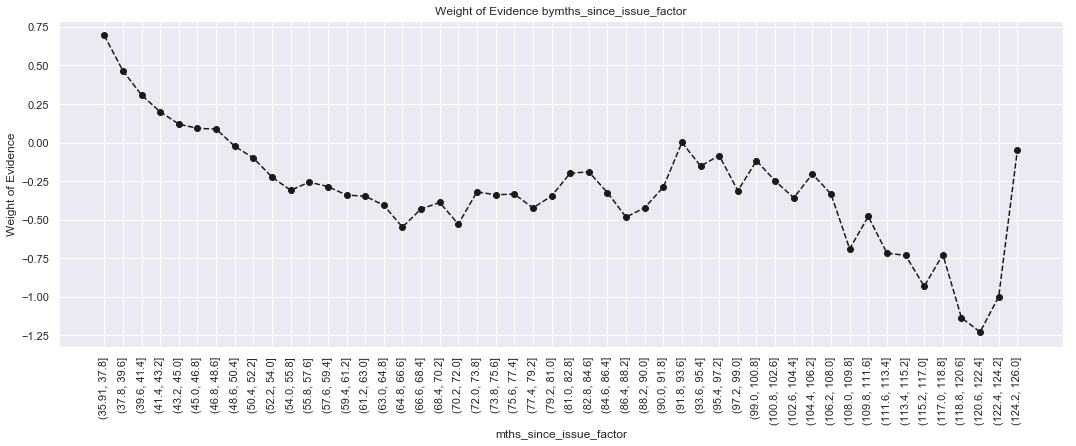

In [286]:
plot_by_woe(df_temp)

The first three bins need to be kept separate from the rest of the categories. They have higher WOEs than the rest of the categories. Plotting the remaining bins to see which ones can be binned together:

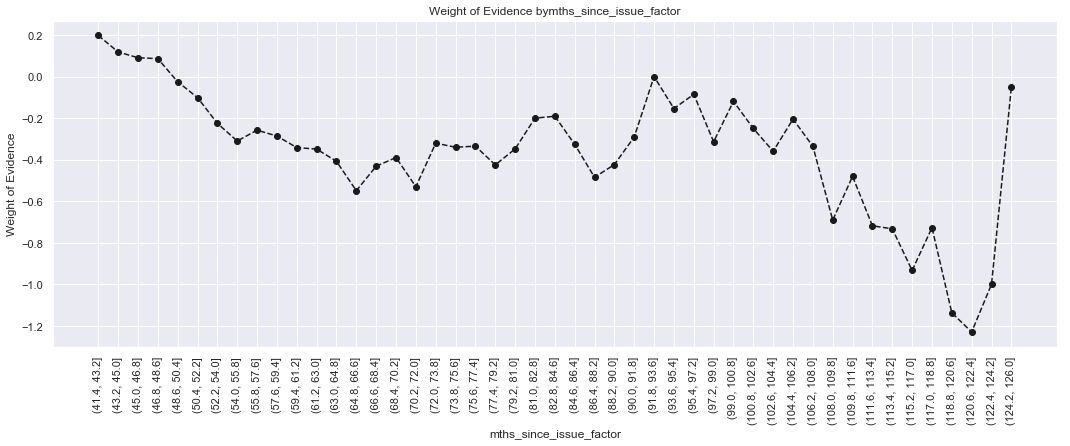

In [287]:
plot_by_woe(df_temp.iloc[3:, :])

The first 4 bins have similar weights of evidence (41.4, 48.6]. The next two categories can be grouped together.(48.6, 52.2]. The next 7 variables have similar WOE and can be grouped together (52.2, 64.8]. 

The rest of the values have highly varying values. This is a warning to check their bin sizes. Usually small bin sizes could contribute to such variation. These can be combined into one dummy variable till there is an upward trend, and the rest of them together. (64.8, 84.60] & (84.60, Inf)

In [288]:
for dataset in data_cleaner: 
    dataset['mths_since_issue_d:<38'] = np.where(dataset['mths_since_issue_d'].isin(range(38)), 1, 0)
    dataset['mths_since_issue_d:38-39'] = np.where(dataset['mths_since_issue_d'].isin(range(38, 40)), 1, 0)
    dataset['mths_since_issue_d:40-41'] = np.where(dataset['mths_since_issue_d'].isin(range(40, 42)), 1, 0)
    dataset['mths_since_issue_d:42-48'] = np.where(dataset['mths_since_issue_d'].isin(range(42, 49)), 1, 0)
    dataset['mths_since_issue_d:49-52'] = np.where(dataset['mths_since_issue_d'].isin(range(49, 53)), 1, 0)
    dataset['mths_since_issue_d:53-64'] = np.where(dataset['mths_since_issue_d'].isin(range(53, 65)), 1, 0)
    dataset['mths_since_issue_d:65-84'] = np.where(dataset['mths_since_issue_d'].isin(range(65, 85)), 1, 0)
    dataset['mths_since_issue_d:>84'] = np.where(dataset['mths_since_issue_d'].isin(range(85, int(dataset['mths_since_issue_d'].max()))), 1, 0)

#### interest rate

In [289]:
loan_data_inputs_train['int_rate'].unique()

array([ 8.9 , 14.33, 16.59, 12.84,  7.49, 10.62, 20.31,  9.17, 15.31,
       16.49,  9.67, 15.8 , 13.65, 14.64, 22.15, 12.49, 10.15, 18.55,
       11.14, 10.64, 15.1 , 16.29, 17.57, 13.67, 11.99, 16.2 , 15.61,
       16.99,  7.12, 12.99, 12.12, 16.78, 11.67, 13.35,  7.51, 18.25,
       10.59, 13.99, 23.1 ,  6.03, 14.16, 13.11, 20.99, 22.2 , 10.99,
       18.85, 19.52, 23.83, 22.45,  7.69, 20.2 ,  6.62, 11.86, 14.09,
       18.49,  9.99,  7.9 , 14.3 , 13.98,  7.62, 21.  , 16.89, 17.19,
       11.55, 16.07, 10.65, 18.75, 18.92, 14.49, 17.14,  8.49, 13.61,
        6.49, 15.59,  9.71, 18.64, 17.27, 12.69, 14.72, 23.7 , 10.37,
        6.92, 10.95, 10.36, 12.35, 19.91, 12.53, 25.8 , 17.77, 11.44,
       17.76, 24.08, 19.2 , 17.56, 19.99,  8.39, 10.16, 18.99,  9.76,
       22.47, 14.99, 13.05,  6.17, 17.1 , 11.11, 18.54, 13.66, 14.31,
       11.71, 20.5 , 14.47, 14.98, 19.72, 13.49,  7.88, 14.65, 15.22,
       13.48, 14.54, 17.99,  6.54, 21.18, 11.12, 12.85, 14.82, 23.43,
       13.43, 16.24,

In [290]:
loan_data_inputs_train['int_rate_factor'] = pd.cut(loan_data_inputs_train['int_rate'], 50)

In [291]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'int_rate_factor', loan_data_targets_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",785,0.961783,0.002104,755.0,30.0,0.002272,0.000736,1.127775,NaN,NaN,0.343349
1,"(5.833, 6.246]",8459,0.980376,0.022677,8293.0,166.0,0.024960,0.004071,1.813434,0.018592,0.685659,0.343349
2,"(6.246, 6.658]",7826,0.971505,0.020980,7603.0,223.0,0.022883,0.005469,1.431381,0.008871,0.382053,0.343349
3,"(6.658, 7.071]",1816,0.973018,0.004868,1767.0,49.0,0.005318,0.001202,1.487473,0.001512,0.056092,0.343349
4,"(7.071, 7.484]",3143,0.976456,0.008426,3069.0,74.0,0.009237,0.001815,1.627297,0.003438,0.139824,0.343349
5,"(7.484, 7.897]",12581,0.962324,0.033727,12107.0,474.0,0.036439,0.011624,1.142587,0.014131,0.484710,0.343349
6,"(7.897, 8.31]",9687,0.949314,0.025969,9196.0,491.0,0.027678,0.012041,0.832335,0.013011,0.310252,0.343349
7,"(8.31, 8.722]",6594,0.965271,0.017677,6365.0,229.0,0.019157,0.005616,1.227103,0.015958,0.394768,0.343349
8,"(8.722, 9.135]",9539,0.937415,0.025572,8942.0,597.0,0.026913,0.014640,0.608852,0.027857,0.618250,0.343349
9,"(9.135, 9.548]",6681,0.963928,0.017910,6440.0,241.0,0.019383,0.005910,1.187742,0.026513,0.578889,0.343349


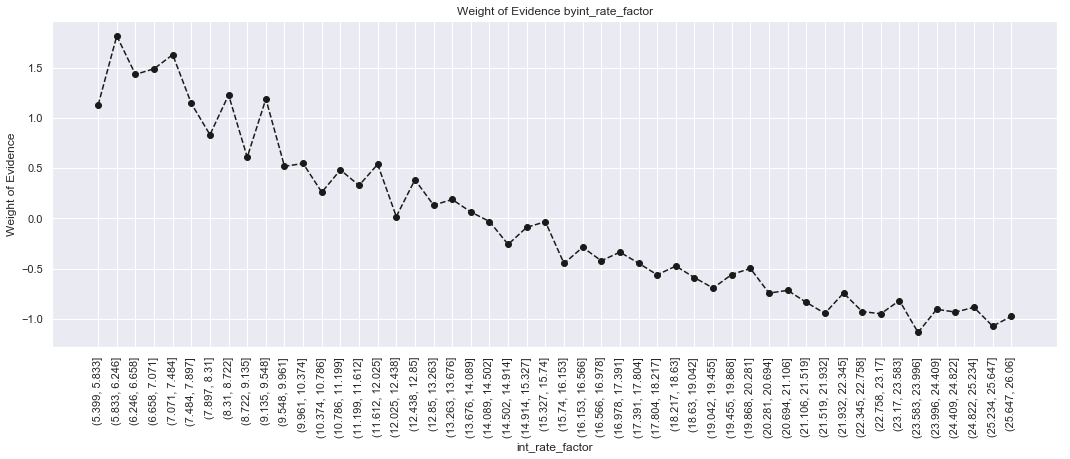

In [292]:
plot_by_woe(df_temp)

Largely the relationship of interest rate w/ WOE is monotonic. The boundaries of the bins will not have an impact on the monotonicity of this relationship. 

Identifying cases where WOE differs significantly from the previous categories (huge jumps or lows).
The first ten bins have very large WOEs have low bin size. They can be combined together. This is till 9.548. 
Then the bins till 12.025 see a reduction in WOE.The other points where a huge change in WOE is seen are 15.74, 20.281, 23.583. 

The bins after that have some variation but have very small bin sizes. 

For a continuous variables, the condition will not look up a list. Instead we will use greater than/less than conditions. 

In [293]:
for dataset in data_cleaner: 
    dataset['int_rate:<9.548'] = np.where((dataset['int_rate'] <= 9.548), 1, 0)
    dataset['int_rate:9.548-12.025'] = np.where((dataset['int_rate'] > 9.548) & (dataset['int_rate'] <= 12.025), 1, 0)
    dataset['int_rate:12.025-15.74'] = np.where((dataset['int_rate'] > 12.025) & (dataset['int_rate'] <= 15.74), 1, 0)
    dataset['int_rate:15.74-20.281'] = np.where((dataset['int_rate'] > 15.74) & (dataset['int_rate'] <= 20.281), 1, 0)
    dataset['int_rate:>20.281'] = np.where((dataset['int_rate'] > 20.281), 1, 0)

#### Funded amount

In [294]:
loan_data_inputs_train['funded_amnt_factor'] = pd.cut(loan_data_inputs_train['funded_amnt'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'funded_amnt_factor', loan_data_targets_train)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1224,0.905229,0.003281,1108.0,116.0,0.003335,0.002845,0.158977,NaN,NaN,0.014139
1,"(1190.0, 1880.0]",3028,0.903897,0.008117,2737.0,291.0,0.008238,0.007136,0.143549,0.001332,0.015427,0.014139
2,"(1880.0, 2570.0]",6018,0.893819,0.016133,5379.0,639.0,0.016190,0.015670,0.032608,0.010078,0.110941,0.014139
3,"(2570.0, 3260.0]",7248,0.889073,0.019430,6444.0,804.0,0.019395,0.019717,-0.016440,0.004746,0.049048,0.014139
4,"(3260.0, 3950.0]",4751,0.891602,0.012736,4236.0,515.0,0.012749,0.012629,0.009463,0.002529,0.025902,0.014139
5,"(3950.0, 4640.0]",9023,0.890945,0.024189,8039.0,984.0,0.024196,0.024131,0.002689,0.000656,0.006774,0.014139
6,"(4640.0, 5330.0]",15903,0.892159,0.042632,14188.0,1715.0,0.042703,0.042057,0.015238,0.001213,0.012549,0.014139
7,"(5330.0, 6020.0]",17236,0.906069,0.046206,15617.0,1619.0,0.047004,0.039703,0.168806,0.013910,0.153568,0.014139
8,"(6020.0, 6710.0]",6914,0.887619,0.018535,6137.0,777.0,0.018471,0.019054,-0.031094,0.018449,0.199900,0.014139
9,"(6710.0, 7400.0]",11806,0.898018,0.031649,10602.0,1204.0,0.031910,0.029526,0.077648,0.010399,0.108742,0.014139


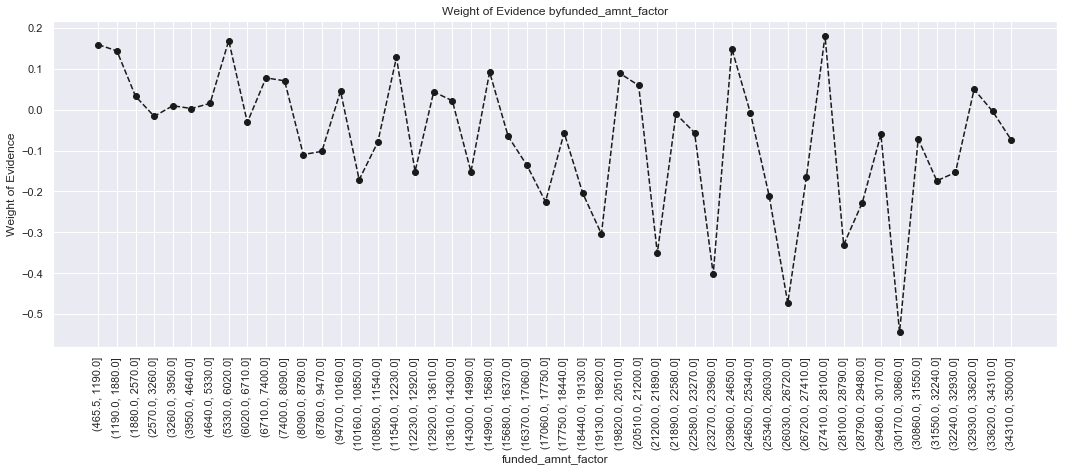

In [295]:
plot_by_woe(df_temp)

Consecutive intervals have very different weights of evidence. All of these variations are around a trend that is almost horizontal. Also, the IV of the variable is low. This is variable with weak predictive power (WoE varies greatly, and there is no association w/ the independent variable. )

This variable can be left out of the model. 

#### months since credit line

In [296]:
loan_data_inputs_train['mths_since_earliest_cr_line'].unique()

array([372., 240., 317., 230., 233., 214., 155., 194., 165., 239., 169.,
       237., 398., 173., 175., 110., 202., 184.,  93., 204., 218., 255.,
       152., 103., 276., 215., 326., 289., 187., 180., 186., 306., 164.,
       304., 192., 235., 244., 181., 114., 312., 190., 212., 157., 229.,
       273., 405., 185., 148., 261., 147., 234., 242.,  99., 243., 158.,
       178., 277., 168., 197., 142., 136., 223., 129., 412., 256., 150.,
       254., 106., 464., 128., 266., 272., 236., 296., 288., 346., 163.,
       156., 593., 251., 222., 300., 122., 268., 205., 219., 335., 231.,
       310., 135., 432., 303., 172., 313., 258., 138., 151., 259., 220.,
       166., 143., 499., 260., 225., 389., 241., 191., 213., 224., 249.,
       488., 332., 161., 141., 353., 357., 413., 322., 227., 302., 195.,
       200., 246., 159., 117., 275., 299., 318., 182., 497., 356., 217.,
       104., 339., 278., 348., 325., 507., 331., 257., 221., 414., 247.,
       267., 102., 291., 384., 179.,  79., 193., 25

In [297]:
loan_data_inputs_train['mths_since_earliest_cr_line_factor'] = pd.cut(loan_data_inputs_train['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'mths_since_earliest_cr_line_factor', loan_data_targets_train)
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.887, 17.74]",24,0.875000,0.000064,21.0,3.0,0.000063,0.000074,-0.151835,NaN,NaN,inf
1,"(17.74, 35.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(35.48, 53.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(53.22, 70.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(70.96, 88.7]",1815,0.898623,0.004866,1631.0,184.0,0.004909,0.004512,0.084268,NaN,NaN,inf
5,"(88.7, 106.44]",3873,0.861606,0.010383,3337.0,536.0,0.010044,0.013144,-0.269052,0.037017,0.353320,inf
6,"(106.44, 124.18]",10048,0.867735,0.026936,8719.0,1329.0,0.026242,0.032591,-0.216667,0.006129,0.052384,inf
7,"(124.18, 141.92]",16745,0.865870,0.044889,14499.0,2246.0,0.043639,0.055079,-0.232816,0.001864,0.016149,inf
8,"(141.92, 159.66]",21889,0.877199,0.058679,19201.0,2688.0,0.057791,0.065918,-0.131580,0.011328,0.101236,inf
9,"(159.66, 177.4]",27877,0.882448,0.074732,24600.0,3277.0,0.074041,0.080362,-0.081927,0.005249,0.049653,inf


In [298]:
loan_data_inputs_train['mths_since_earliest_cr_line'].min()

0.0

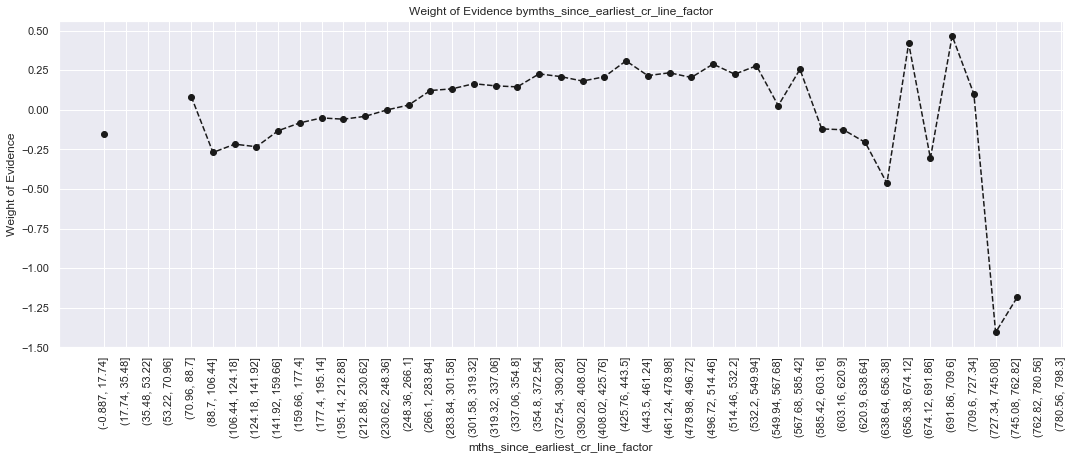

In [299]:
plot_by_woe(df_temp)

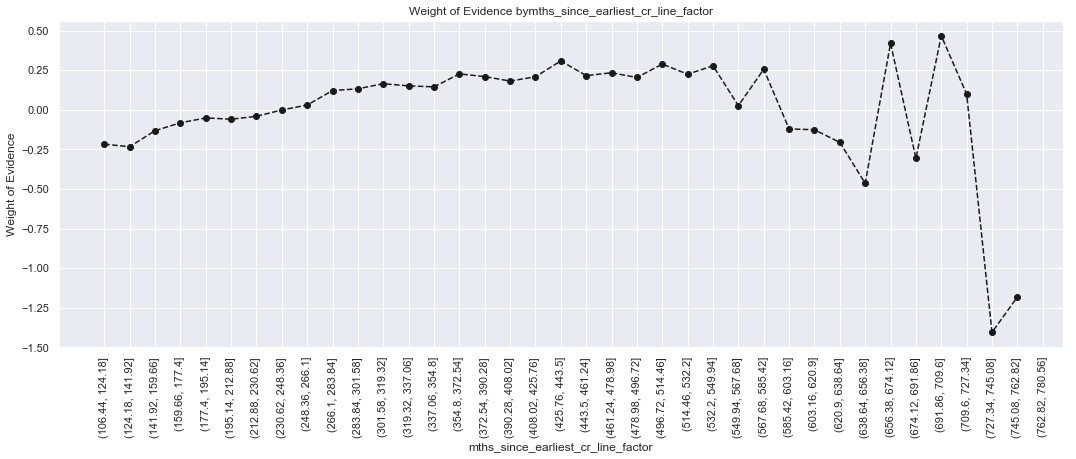

In [300]:
plot_by_woe(df_temp.iloc[6:, :])

In [301]:
for dataset in data_cleaner: 
    dataset['mths_since_earliest_cr_line:<140'] = np.where(dataset['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
    dataset['mths_since_earliest_cr_line:141-164'] = np.where(dataset['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
    dataset['mths_since_earliest_cr_line:165-247'] = np.where(dataset['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
    dataset['mths_since_earliest_cr_line:248-270'] = np.where(dataset['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
    dataset['mths_since_earliest_cr_line:271-352'] = np.where(dataset['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
    dataset['mths_since_earliest_cr_line:>352'] = np.where(dataset['mths_since_earliest_cr_line'].isin(range(353, int(dataset['mths_since_earliest_cr_line'].max()))), 1, 0)

#### Installment

In [302]:
loan_data_inputs_train['installment'].unique()

array([762.08, 343.39, 648.56, ..., 718.44, 735.11, 464.48])

In [303]:
loan_data_inputs_train['installment_factor'] = pd.cut(loan_data_inputs_train['installment'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'installment_factor', loan_data_targets_train)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1812,0.906181,0.004858,1642.0,170.0,0.004942,0.004169,0.170127,NaN,NaN,0.013497
1,"(43.556, 71.443]",4841,0.897542,0.012978,4345.0,496.0,0.013078,0.012163,0.072460,0.008639,0.097667,0.013497
2,"(71.443, 99.329]",6824,0.893025,0.018294,6094.0,730.0,0.018342,0.017902,0.024270,0.004517,0.048190,0.013497
3,"(99.329, 127.216]",9138,0.890348,0.024497,8136.0,1002.0,0.024488,0.024572,-0.003444,0.002677,0.027715,0.013497
4,"(127.216, 155.102]",10040,0.896514,0.026915,9001.0,1039.0,0.027091,0.025479,0.061332,0.006166,0.064776,0.013497
5,"(155.102, 182.988]",16816,0.894208,0.045080,15037.0,1779.0,0.045258,0.043626,0.036717,0.002306,0.024615,0.013497
6,"(182.988, 210.875]",17216,0.904798,0.046152,15577.0,1639.0,0.046883,0.040193,0.153964,0.010590,0.117247,0.013497
7,"(210.875, 238.761]",15090,0.900398,0.040453,13587.0,1503.0,0.040894,0.036858,0.103905,0.004400,0.050059,0.013497
8,"(238.761, 266.648]",18842,0.901391,0.050511,16984.0,1858.0,0.051118,0.045564,0.115026,0.000993,0.011121,0.013497
9,"(266.648, 294.534]",20100,0.891095,0.053883,17911.0,2189.0,0.053908,0.053681,0.004225,0.010296,0.110801,0.013497


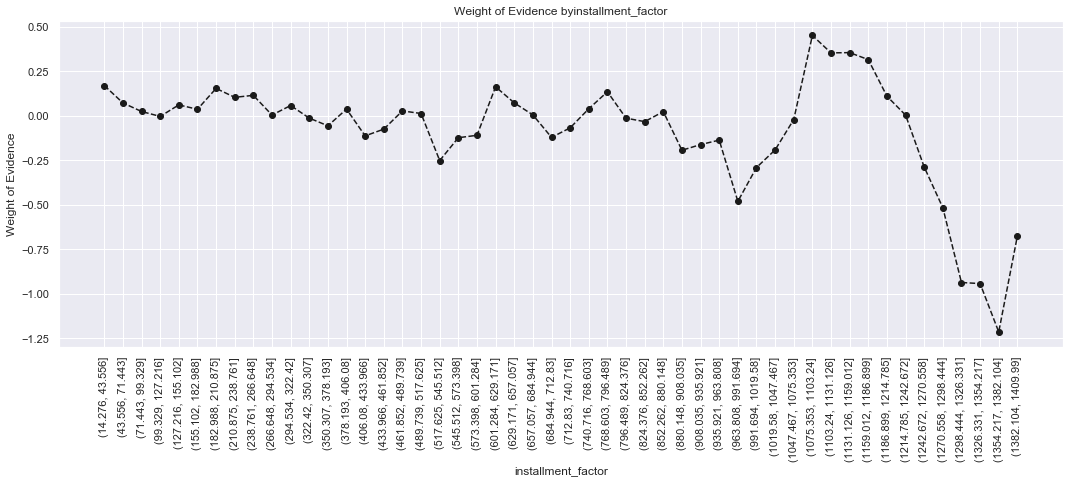

In [304]:
plot_by_woe(df_temp)

Installement has very low IV, and a highly erratic WoE graph. 

#### Delinquency in the last 2 years

In [305]:
loan_data_inputs_train['delinq_2yrs'].unique()

array([ 0.,  1.,  4.,  2.,  5.,  3.,  6.,  9.,  8.,  7., 11., 24., 10.,
       12., 18., 13., 14., 17., 19., 15., 16., 22., 21., 29.])

In [306]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'delinq_2yrs', loan_data_targets_train)
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306417,0.890499,0.821432,272864.0,33553.0,0.821261,0.822821,-0.001898,NaN,NaN,inf
1,1.0,44927,0.893249,0.120439,40131.0,4796.0,0.120786,0.117612,0.026622,0.002750,0.028520,inf
2,2.0,13118,0.889007,0.035166,11662.0,1456.0,0.035100,0.035706,-0.017102,0.004242,0.043724,inf
3,3.0,4550,0.883297,0.012197,4019.0,531.0,0.012096,0.013022,-0.073719,0.005711,0.056616,inf
4,4.0,1868,0.898822,0.005008,1679.0,189.0,0.005053,0.004635,0.086462,0.015526,0.160180,inf
5,5.0,966,0.881988,0.002590,852.0,114.0,0.002564,0.002796,-0.086357,0.016835,0.172819,inf
6,6.0,501,0.902196,0.001343,452.0,49.0,0.001360,0.001202,0.124117,0.020208,0.210474,inf
7,7.0,279,0.860215,0.000748,240.0,39.0,0.000722,0.000956,-0.280668,0.041981,0.404785,inf
8,8.0,148,0.905405,0.000397,134.0,14.0,0.000403,0.000343,0.161037,0.045190,0.441705,inf
9,9.0,89,0.887640,0.000239,79.0,10.0,0.000238,0.000245,-0.030882,0.017765,0.191920,inf


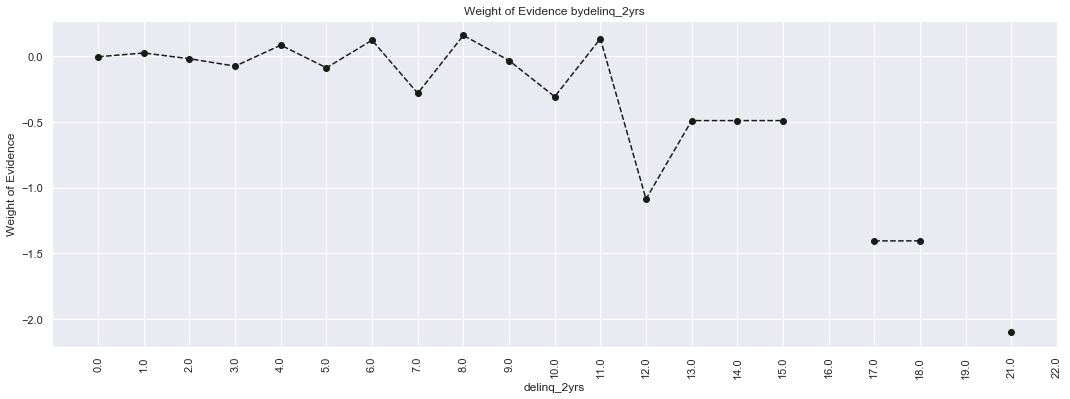

In [307]:
plot_by_woe(df_temp)

Most accounts have 0 delinquencies. They can remain in a separate category. Then the values from 1-3 delinquencies. The bins after that have very few values, so they can all be clubbed together. 

In [308]:
for dataset in data_cleaner: 
    dataset['delinq_2yrs:0'] = np.where((dataset['delinq_2yrs'] == 0), 1, 0)
    dataset['delinq_2yrs:1-3'] = np.where((dataset['delinq_2yrs'] >= 1) & (dataset['delinq_2yrs'] <= 3), 1, 0)
    dataset['delinq_2yrs:>=4'] = np.where((dataset['delinq_2yrs'] >= 9), 1, 0)

#### Inquiries in the last 6 months

In [309]:
loan_data_inputs_train['inq_last_6mths'].unique()

array([ 1.,  2.,  3.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 12., 28., 11.,
       15., 14., 13., 10., 20., 16., 24., 17., 33., 18., 31., 19., 25.,
       27., 32.])

In [310]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'inq_last_6mths', loan_data_targets_train)
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193232,0.908395,0.518009,175531.0,17701.0,0.528310,0.434082,0.196450,NaN,NaN,inf
1,1.0,104163,0.884950,0.279236,92179.0,11984.0,0.277439,0.293884,-0.057585,0.023446,0.254035,inf
2,2.0,46214,0.864197,0.123889,39938.0,6276.0,0.120205,0.153907,-0.247150,0.020753,0.189564,inf
3,3.0,20040,0.839671,0.053723,16827.0,3213.0,0.050646,0.078792,-0.441965,0.024526,0.194816,inf
4,4.0,5810,0.848365,0.015575,4929.0,881.0,0.014835,0.021605,-0.375911,0.008694,0.066054,inf
5,5.0,2217,0.824989,0.005943,1829.0,388.0,0.005505,0.009515,-0.547226,0.023376,0.171314,inf
6,6.0,977,0.788127,0.002619,770.0,207.0,0.002318,0.005076,-0.784073,0.036862,0.236848,inf
7,7.0,159,0.679245,0.000426,108.0,51.0,0.000325,0.001251,-1.347439,0.108882,0.563366,inf
8,8.0,101,0.643564,0.000271,65.0,36.0,0.000196,0.000883,-1.506877,0.035681,0.159437,inf
9,9.0,43,0.674419,0.000115,29.0,14.0,0.000087,0.000343,-1.369506,0.030854,0.137370,inf


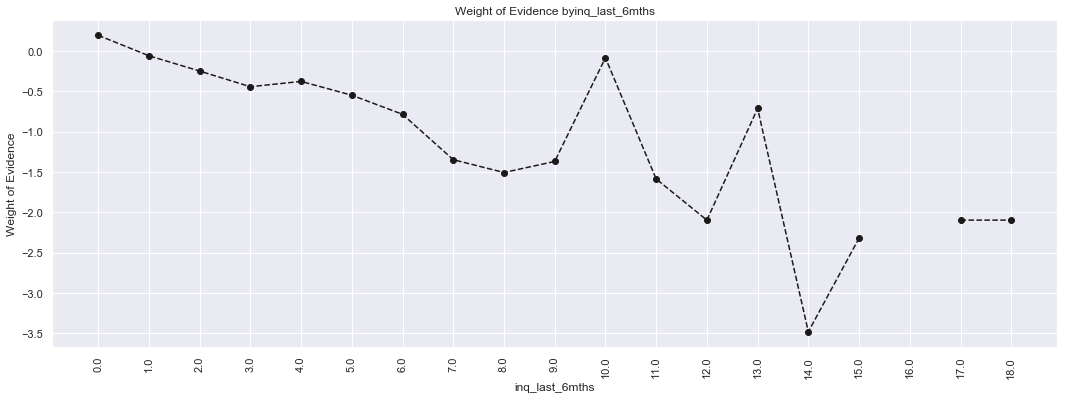

In [311]:
plot_by_woe(df_temp)

The values equal to 0 need to be a separate category. Bins from 1-3 can be combined. Then the next cutoff can be around 6. The rest of the bins have very few values and can be combined together. 

In [312]:
for dataset in data_cleaner: 
    dataset['inq_last_6mths:0'] = np.where((dataset['inq_last_6mths'] == 0), 1, 0)
    dataset['inq_last_6mths:1-2'] = np.where((dataset['inq_last_6mths'] >= 1) & (dataset['inq_last_6mths'] <= 2), 1, 0)
    dataset['inq_last_6mths:3-6'] = np.where((dataset['inq_last_6mths'] >= 3) & (dataset['inq_last_6mths'] <= 6), 1, 0)
    dataset['inq_last_6mths:>6'] = np.where((dataset['inq_last_6mths'] > 6), 1, 0)

#### Number of trades

In [313]:
loan_data_inputs_train['open_acc'].unique()

array([20., 15.,  9., 14.,  5., 13., 11.,  6., 10.,  7., 16.,  4.,  8.,
       12., 17.,  3., 18., 26., 24.,  2., 19., 25., 27., 30., 23., 22.,
       21.,  1., 29., 33., 28., 34.,  0., 41., 38., 32., 37., 31., 42.,
       40., 45., 46., 35., 36., 39., 44., 43., 49., 50., 53., 47., 48.,
       55., 51., 54., 62., 76., 84., 58., 52., 75.])

In [314]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'open_acc', loan_data_targets_train)
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,29,0.758621,0.000078,22.0,7.0,0.000066,0.000172,-0.952613,NaN,NaN,inf
1,1.0,110,0.872727,0.000295,96.0,14.0,0.000289,0.000343,-0.172454,0.114107,0.780159,inf
2,2.0,1456,0.845467,0.003903,1231.0,225.0,0.003705,0.005518,-0.398263,0.027260,0.225809,inf
3,3.0,4378,0.873687,0.011736,3825.0,553.0,0.011512,0.013561,-0.163789,0.028220,0.234474,inf
4,4.0,10028,0.891504,0.026883,8940.0,1088.0,0.026907,0.026681,0.008449,0.017817,0.172239,inf
5,5.0,17141,0.891255,0.045951,15277.0,1864.0,0.045980,0.045711,0.005879,0.000249,0.002571,inf
6,6.0,24621,0.892368,0.066003,21971.0,2650.0,0.066128,0.064986,0.017419,0.001113,0.011540,inf
7,7.0,30169,0.891544,0.080876,26897.0,3272.0,0.080954,0.080239,0.008868,0.000824,0.008550,inf
8,8.0,33579,0.891033,0.090017,29920.0,3659.0,0.090053,0.089730,0.003592,0.000511,0.005276,inf
9,9.0,35251,0.889195,0.094500,31345.0,3906.0,0.094342,0.095787,-0.015204,0.001838,0.018796,inf


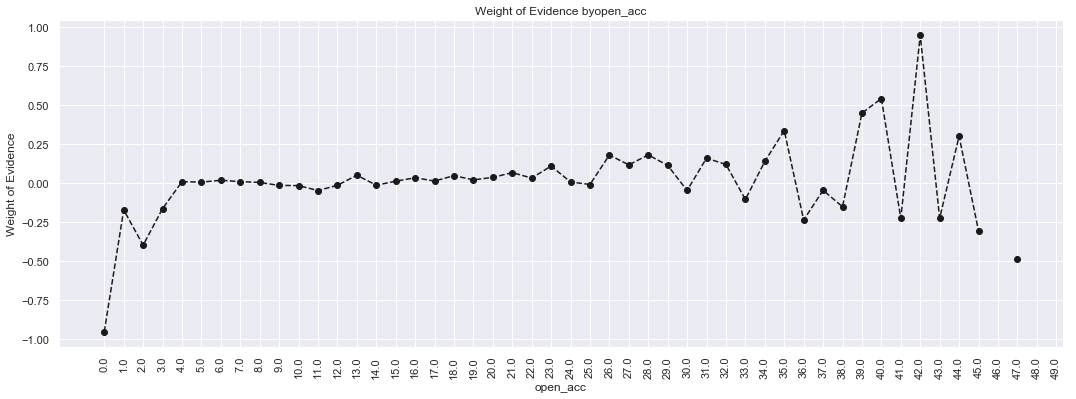

In [315]:
plot_by_woe(df_temp)

In [316]:
for dataset in data_cleaner: 
    dataset['open_acc:0'] = np.where((dataset['open_acc'] == 0), 1, 0)
    dataset['open_acc:1-3'] = np.where((dataset['open_acc'] >= 1) & (dataset['open_acc'] <= 3), 1, 0)
    dataset['open_acc:4-12'] = np.where((dataset['open_acc'] >= 4) & (dataset['open_acc'] <= 12), 1, 0)
    dataset['open_acc:13-17'] = np.where((dataset['open_acc'] >= 13) & (dataset['open_acc'] <= 17), 1, 0)
    dataset['open_acc:18-22'] = np.where((dataset['open_acc'] >= 18) & (dataset['open_acc'] <= 22), 1, 0)
    dataset['open_acc:23-25'] = np.where((dataset['open_acc'] >= 23) & (dataset['open_acc'] <= 25), 1, 0)
    dataset['open_acc:26-30'] = np.where((dataset['open_acc'] >= 26) & (dataset['open_acc'] <= 30), 1, 0)
    dataset['open_acc:>=31'] = np.where((dataset['open_acc'] >= 31), 1, 0)

#### Number of public records

In [317]:
loan_data_inputs_train['pub_rec'].unique()

array([ 0.,  1.,  3.,  2.,  5.,  4.,  6.,  7.,  9., 10., 13.,  8., 19.,
       11., 17., 34., 16., 12., 40., 18., 54., 15., 63., 21.])

In [318]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'pub_rec', loan_data_targets_train)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323999,0.889941,0.868565,288340.0,35659.0,0.867840,0.874467,-0.007606,NaN,NaN,inf
1,1.0,42381,0.893419,0.113613,37864.0,4517.0,0.113962,0.110771,0.028408,0.003478,0.036014,inf
2,2.0,4527,0.903247,0.012136,4089.0,438.0,0.012307,0.010741,0.136092,0.009828,0.107684,inf
3,3.0,1280,0.920312,0.003431,1178.0,102.0,0.003546,0.002501,0.348856,0.017065,0.212764,inf
4,4.0,408,0.924020,0.001094,377.0,31.0,0.001135,0.000760,0.400513,0.003707,0.051657,inf
5,5.0,203,0.911330,0.000544,185.0,18.0,0.000557,0.000441,0.232239,0.012690,0.168274,inf
6,6.0,117,0.931624,0.000314,109.0,8.0,0.000328,0.000196,0.514161,0.020294,0.281922,inf
7,7.0,48,0.958333,0.000129,46.0,2.0,0.000138,0.000049,1.037749,0.026709,0.523588,inf
8,8.0,24,1.000000,0.000064,24.0,0.0,0.000072,0.000000,inf,0.041667,inf,inf
9,9.0,14,0.785714,0.000038,11.0,3.0,0.000033,0.000074,-0.798462,0.214286,inf,inf


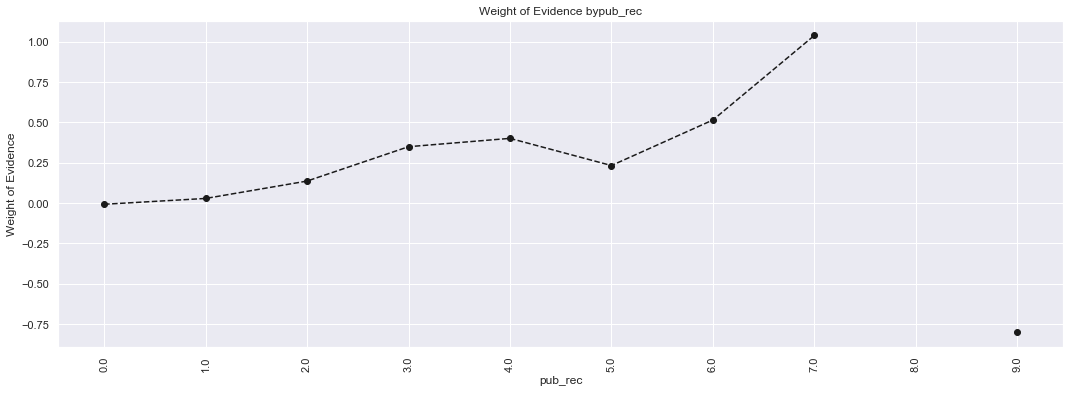

In [319]:
plot_by_woe(df_temp)

In [320]:
for dataset in data_cleaner: 
    dataset['pub_rec:0-2'] = np.where((dataset['pub_rec'] >= 0) & (dataset['pub_rec'] <= 2), 1, 0)
    dataset['pub_rec:3-4'] = np.where((dataset['pub_rec'] >= 3) & (dataset['pub_rec'] <= 4), 1, 0)
    dataset['pub_rec:>=5'] = np.where((dataset['pub_rec'] >= 5), 1, 0)

#### Number of accounts

In [321]:
loan_data_inputs_train['total_acc'].unique()

array([ 32.,  38.,  20.,  13.,  30.,  26.,   6.,  21.,  36.,  48.,  25.,
        33.,  27.,  23.,  44.,   9.,  10.,  18.,  31.,   5.,  19.,  15.,
        39.,  12.,  57.,  24.,  22.,  17.,  16.,  42.,   7.,  29.,  28.,
        34.,  43.,  63.,  14.,  11.,  40.,  37.,  41.,  45.,  35.,  49.,
        54.,  52.,  53.,  60.,  56.,   4.,   8.,  47.,  51.,  46.,  61.,
        59.,  50.,  58.,   0.,  64.,   3.,  55.,  62.,   2.,   1.,  71.,
       105.,  66.,  68.,  69.,  67.,  80.,  70.,  65.,  75.,  85.,  93.,
        83.,  73.,  78.,  81.,  74.,  84.,  77.,  89.,  87.,  72.,  76.,
       117.,  90.,  95.,  79.,  91., 121., 119., 100., 118.,  86., 102.,
        82.,  96.,  92., 116.,  94.,  98.,  88., 150., 106., 124.,  97.,
       101.,  99.])

In [322]:
loan_data_inputs_train['total_acc_factor']= pd.cut(loan_data_inputs_train['total_acc'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'total_acc_factor', loan_data_targets_train)
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",459,0.810458,0.001230,372.0,87.0,0.001120,0.002134,-0.644759,NaN,NaN,inf
1,"(3.0, 6.0]",6004,0.864757,0.016095,5192.0,812.0,0.015627,0.019913,-0.242371,0.054299,0.402388,inf
2,"(6.0, 9.0]",15047,0.873131,0.040337,13138.0,1909.0,0.039543,0.046814,-0.168816,0.008374,0.073555,inf
3,"(9.0, 12.0]",25169,0.881283,0.067472,22181.0,2988.0,0.066760,0.073275,-0.093113,0.008152,0.075703,inf
4,"(12.0, 15.0]",33651,0.881281,0.090210,29656.0,3995.0,0.089258,0.097969,-0.093124,0.000001,0.000011,inf
5,"(15.0, 18.0]",38711,0.887267,0.103775,34347.0,4364.0,0.103377,0.107018,-0.034619,0.005986,0.058505,inf
6,"(18.0, 21.0]",40599,0.886155,0.108836,35977.0,4622.0,0.108283,0.113345,-0.045693,0.001112,0.011073,inf
7,"(21.0, 24.0]",40163,0.891492,0.107668,35805.0,4358.0,0.107765,0.106871,0.008329,0.005337,0.054022,inf
8,"(24.0, 27.0]",36286,0.895442,0.097274,32492.0,3794.0,0.097794,0.093040,0.049828,0.003950,0.041499,inf
9,"(27.0, 30.0]",31775,0.899103,0.085181,28569.0,3206.0,0.085986,0.078621,0.089553,0.003661,0.039725,inf


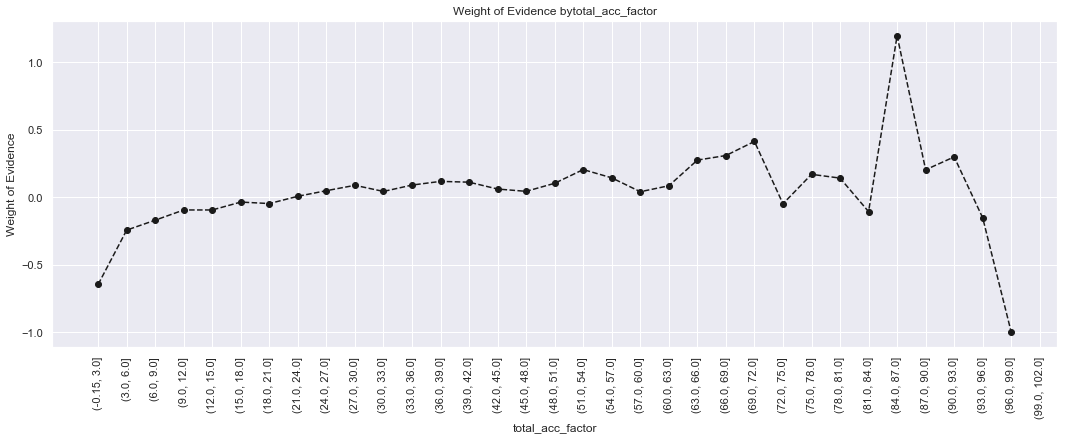

In [323]:
plot_by_woe(df_temp)

In [324]:
for dataset in data_cleaner: 
    dataset['total_acc:<=27'] = np.where((dataset['total_acc'] <= 27), 1, 0)
    dataset['total_acc:28-51'] = np.where((dataset['total_acc'] >= 28) & (dataset['total_acc'] <= 51), 1, 0)
    dataset['total_acc:>=52'] = np.where((dataset['total_acc'] >= 52), 1, 0)

#### Accounts now delinquent

In [325]:
loan_data_inputs_train['acc_now_delinq'].unique()

array([0., 1., 2., 3., 4., 5.])

In [326]:
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'acc_now_delinq', loan_data_targets_train)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371682,0.890648,0.996392,331038.0,40644.0,0.996352,0.996714,-0.000363,NaN,NaN,inf
1,1.0,1263,0.899446,0.003386,1136.0,127.0,0.003419,0.003114,0.093337,0.008797,0.093700,inf
2,2.0,70,0.928571,0.000188,65.0,5.0,0.000196,0.000123,0.467204,0.029126,0.373868,inf
3,3.0,7,0.857143,0.000019,6.0,1.0,0.000018,0.000025,-0.305986,0.071429,0.773190,inf
4,4.0,4,1.000000,0.000011,4.0,0.0,0.000012,0.000000,inf,0.142857,inf,inf
5,5.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000025,-2.097745,0.500000,inf,inf


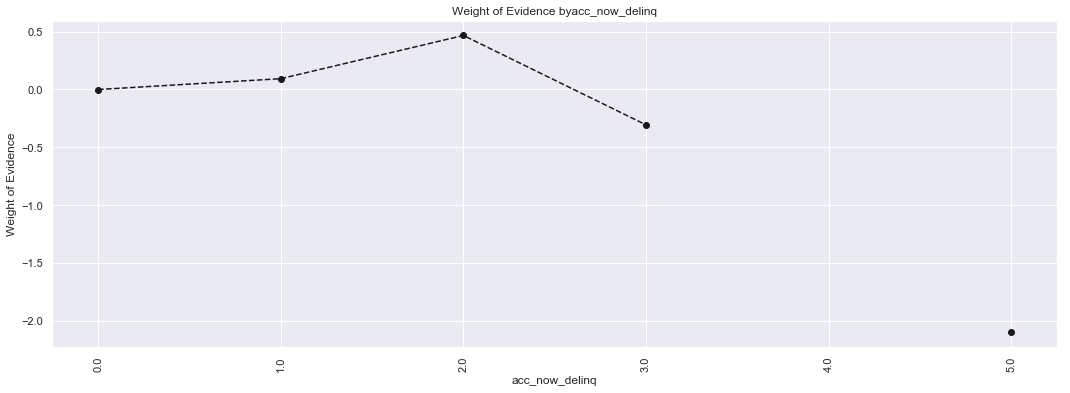

In [327]:
plot_by_woe(df_temp)

In [328]:
for dataset in data_cleaner: 
    dataset['acc_now_delinq:0'] = np.where((dataset['acc_now_delinq'] == 0), 1, 0)
    dataset['acc_now_delinq:>=1'] = np.where((dataset['acc_now_delinq'] >= 1), 1, 0)

#### Annual income

This variable can have only positive values and has values running upto millions.

In [329]:
loan_data_inputs_train['annual_inc_factor'] = pd.cut(loan_data_inputs_train['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'annual_inc_factor', loan_data_targets_train)
# We calculate weight of evidence.
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 144693.64]",351904,0.888566,0.943372,312690.0,39214.0,0.941129,0.961646,-0.021567,NaN,NaN,inf
1,"(144693.64, 287491.28]",19004,0.925437,0.050945,17587.0,1417.0,0.052933,0.034749,0.420873,0.036871,0.442440,inf
2,"(287491.28, 430288.92]",1525,0.930492,0.004088,1419.0,106.0,0.004271,0.002599,0.496524,0.005055,0.075651,inf
3,"(430288.92, 573086.56]",332,0.939759,0.000890,312.0,20.0,0.000939,0.000490,0.649526,0.009267,0.153002,inf
4,"(573086.56, 715884.2]",112,0.883929,0.000300,99.0,13.0,0.000298,0.000319,-0.067574,0.055830,0.717100,inf
5,"(715884.2, 858681.84]",65,0.892308,0.000174,58.0,7.0,0.000175,0.000172,0.016788,0.008379,0.084362,inf
6,"(858681.84, 1001479.48]",39,0.974359,0.000105,38.0,1.0,0.000114,0.000025,1.539841,0.082051,1.523053,inf
7,"(1001479.48, 1144277.12]",10,1.000000,0.000027,10.0,0.0,0.000030,0.000000,inf,0.025641,inf,inf
8,"(1144277.12, 1287074.76]",12,1.000000,0.000032,12.0,0.0,0.000036,0.000000,inf,0.000000,NaN,inf
9,"(1287074.76, 1429872.4]",6,1.000000,0.000016,6.0,0.0,0.000018,0.000000,inf,0.000000,NaN,inf


There are a large number of values in the first interval (~94% of values). In this case, it might be worthwhile to split the variable into more classes. Eg. 100

In [330]:
loan_data_inputs_train['annual_inc_factor'] = pd.cut(loan_data_inputs_train['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'annual_inc_factor', loan_data_targets_train)
# We calculate weight of evidence.
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5243.882, 73294.82]",231445,0.875901,0.620449,202723.0,28722.0,0.610152,0.704350,-0.143568,NaN,NaN,inf
1,"(73294.82, 144693.64]",120459,0.912900,0.322922,109967.0,10492.0,0.330977,0.257296,0.251822,0.036998,0.395390,inf
2,"(144693.64, 216092.46]",15885,0.925087,0.042584,14695.0,1190.0,0.044229,0.029182,0.415809,0.012187,0.163987,inf
3,"(216092.46, 287491.28]",3119,0.927220,0.008361,2892.0,227.0,0.008704,0.005567,0.447009,0.002134,0.031200,inf
4,"(287491.28, 358890.1]",1117,0.929275,0.002994,1038.0,79.0,0.003124,0.001937,0.477858,0.002055,0.030850,inf
5,"(358890.1, 430288.92]",408,0.933824,0.001094,381.0,27.0,0.001147,0.000662,0.549218,0.004549,0.071359,inf
6,"(430288.92, 501687.74]",245,0.946939,0.000657,232.0,13.0,0.000698,0.000319,0.784043,0.013115,0.234826,inf
7,"(501687.74, 573086.56]",87,0.919540,0.000233,80.0,7.0,0.000241,0.000172,0.338372,0.027399,0.445672,inf
8,"(573086.56, 644485.38]",61,0.868852,0.000164,53.0,8.0,0.000160,0.000196,-0.206895,0.050688,0.545266,inf
9,"(644485.38, 715884.2]",51,0.901961,0.000137,46.0,5.0,0.000138,0.000123,0.121459,0.033108,0.328353,inf


This makes things better, but still the first category ends up with 60% of observations. This is logical, because there are very few people with high incomes. We can increate one dummy variable for rich , while exploring the rest of the categories separately. Let the cutoff for rich start at the 3rd bin (144693.64). 

Initial examination shows that there are too few individuals with large income and too many with small income. Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine the categories of everyone with 140k or less.

In [331]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
loan_data_inputs_train_temp = loan_data_inputs_train.loc[loan_data_inputs_train['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#loan_data_inputs_train_temp

In [332]:
loan_data_inputs_train_temp["annual_inc_factor"] = pd.cut(loan_data_inputs_train_temp['annual_inc'], 50)
loan_data_inputs_train_temp["annual_inc_factor"].unique()

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


[(76472.16, 79234.24], (109617.12, 112379.2], (81996.32, 84758.4], (40565.12, 43327.2], (93044.64, 95806.72], ..., (101330.88, 104092.96], (131713.76, 134475.84], (7420.16, 10182.24], (4658.08, 7420.16], (1757.896, 4658.08]]
Length: 50
Categories (50, interval[float64]): [(1757.896, 4658.08] < (4658.08, 7420.16] < (7420.16, 10182.24] < (10182.24, 12944.32] ... (128951.68, 131713.76] < (131713.76, 134475.84] < (134475.84, 137237.92] < (137237.92, 140000.0]]

In [333]:
df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'annual_inc_factor', 
                                 loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1757.896, 4658.08]",15,0.800000,0.000043,12.0,3.0,0.000038,0.000077,-0.689458,NaN,NaN,0.049818
1,"(4658.08, 7420.16]",40,0.750000,0.000114,30.0,10.0,0.000096,0.000256,-0.977140,0.050000,0.287682,0.049818
2,"(7420.16, 10182.24]",287,0.874564,0.000818,251.0,36.0,0.000805,0.000920,-0.133818,0.124564,0.843322,0.049818
3,"(10182.24, 12944.32]",547,0.828154,0.001558,453.0,94.0,0.001452,0.002402,-0.503155,0.046411,0.369337,0.049818
4,"(12944.32, 15706.4]",1210,0.830579,0.003447,1005.0,205.0,0.003222,0.005238,-0.486019,0.002425,0.017135,0.049818
5,"(15706.4, 18468.48]",1522,0.847569,0.004335,1290.0,232.0,0.004136,0.005928,-0.360092,0.016990,0.125927,0.049818
6,"(18468.48, 21230.56]",2928,0.855533,0.008340,2505.0,423.0,0.008031,0.010809,-0.297080,0.007964,0.063012,0.049818
7,"(21230.56, 23992.64]",2495,0.844489,0.007107,2107.0,388.0,0.006755,0.009914,-0.383737,0.011044,0.086657,0.049818
8,"(23992.64, 26754.72]",7016,0.848632,0.019985,5954.0,1062.0,0.019088,0.027137,-0.351843,0.004143,0.031894,0.049818
9,"(26754.72, 29516.8]",5643,0.857345,0.016074,4838.0,805.0,0.015510,0.020570,-0.282338,0.008714,0.069505,0.049818


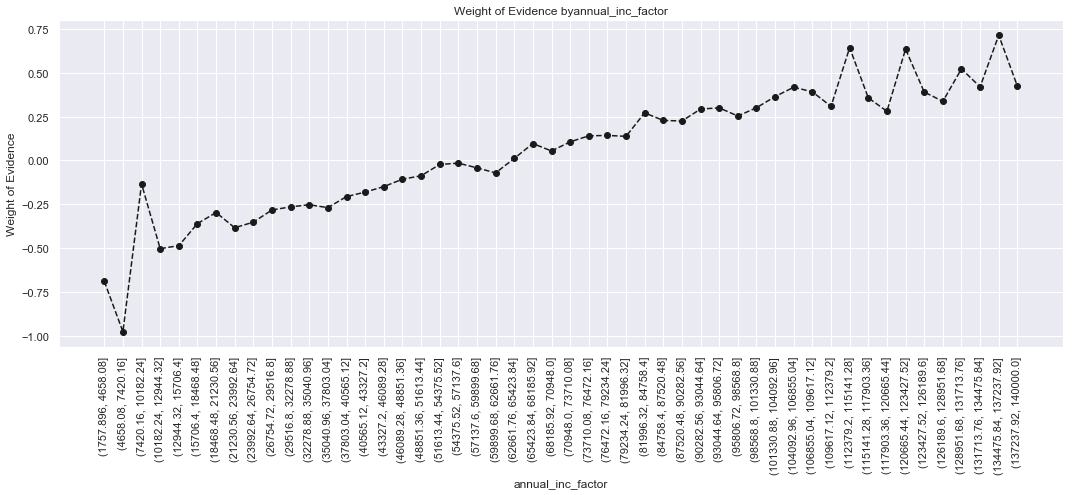

In [334]:
plot_by_woe(df_temp) 

In [335]:
# WoE is monotonically increasing with income, so we split income in 12 categories
for dataset in data_cleaner: 
    dataset['annual_inc:<20K'] = np.where((dataset['annual_inc'] <= 20000), 1, 0)
    dataset['annual_inc:20K-30K'] = np.where((dataset['annual_inc'] > 20000) & (dataset['annual_inc'] <= 30000), 1, 0)
    dataset['annual_inc:30K-40K'] = np.where((dataset['annual_inc'] > 30000) & (dataset['annual_inc'] <= 40000), 1, 0)
    dataset['annual_inc:40K-50K'] = np.where((dataset['annual_inc'] > 40000) & (dataset['annual_inc'] <= 50000), 1, 0)
    dataset['annual_inc:50K-60K'] = np.where((dataset['annual_inc'] > 50000) & (dataset['annual_inc'] <= 60000), 1, 0)
    dataset['annual_inc:60K-70K'] = np.where((dataset['annual_inc'] > 60000) & (dataset['annual_inc'] <= 70000), 1, 0)
    dataset['annual_inc:70K-80K'] = np.where((dataset['annual_inc'] > 70000) & (dataset['annual_inc'] <= 80000), 1, 0)
    dataset['annual_inc:80K-90K'] = np.where((dataset['annual_inc'] > 80000) & (dataset['annual_inc'] <= 90000), 1, 0)
    dataset['annual_inc:90K-100K'] = np.where((dataset['annual_inc'] > 90000) & (dataset['annual_inc'] <= 100000), 1, 0)
    dataset['annual_inc:100K-120K'] = np.where((dataset['annual_inc'] > 100000) & (dataset['annual_inc'] <= 120000), 1, 0)
    dataset['annual_inc:120K-140K'] = np.where((dataset['annual_inc'] > 120000) & (dataset['annual_inc'] <= 140000), 1, 0)
    dataset['annual_inc:>140K'] = np.where((dataset['annual_inc'] > 140000), 1, 0)


#### Months since last delinquency

In [336]:
loan_data_inputs_train['mths_since_last_delinq'].unique()

array([ nan,  18.,  46.,   6.,  11.,  31.,  38.,  54.,  16.,  10.,  13.,
        49.,   9.,  68.,  14.,  15.,  45.,  44.,   7.,  30.,  47.,  37.,
        80.,  39.,  26.,  65.,  78.,  76.,  33.,  48.,  35.,  58.,   3.,
        43.,  27.,   5.,  36.,  56.,   2.,  60.,  29.,  17.,  81.,   8.,
        77.,  64.,  59.,  25.,  21.,  57.,  22.,  19.,  24.,  69.,  50.,
        23.,  73.,  82.,  66.,  55.,  79.,  41.,  12.,  32.,  40.,  74.,
         4.,  52.,  42.,  63.,  67.,  34.,  51.,  70.,  61.,  53.,  75.,
        28.,  71.,  62.,  20.,  72.,  91.,   0.,   1.,  93., 104.,  83.,
       101., 134.,  90.,  95., 120.,  96.,  88.,  84.,  85., 151.,  89.,
        94., 131.,  92.,  86.,  87., 130.,  99., 139., 135., 105., 159.,
       133.,  97.,  98., 126., 114., 116., 110., 111., 149., 141., 140.,
       106., 100., 146., 113., 103., 102., 129., 115., 107., 108., 136.,
       148., 180., 122., 152., 109., 156., 188., 127.])

This variable has null values. The binning exercise should not consider those. However, instead  of dropping these variables, we can introduce a new dummy variable that takes on a value 1 when the value is nan and 0 when its not. Examining the WoE of the remaining values:

In [337]:
loan_data_inputs_train_temp = loan_data_inputs_train[pd.notnull(loan_data_inputs_train['mths_since_last_delinq'])]
loan_data_inputs_train_temp['mths_since_last_delinq_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_delinq'], 50)


C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [338]:
df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'mths_since_last_delinq_factor', 
                                 loan_data_targets_train[loan_data_inputs_train_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5277,0.871518,0.030531,4599.0,678.0,0.029814,0.036481,-0.201825,NaN,NaN,inf
1,"(3.76, 7.52]",11167,0.887615,0.064608,9912.0,1255.0,0.064256,0.067528,-0.049661,0.016097,0.152164,inf
2,"(7.52, 11.28]",13306,0.892830,0.076983,11880.0,1426.0,0.077014,0.076729,0.003711,0.005215,0.053372,inf
3,"(11.28, 15.04]",13216,0.888847,0.076462,11747.0,1469.0,0.076152,0.079042,-0.037256,0.003983,0.040967,inf
4,"(15.04, 18.8]",9337,0.894934,0.054020,8356.0,981.0,0.054169,0.052785,0.025891,0.006087,0.063147,inf
5,"(18.8, 22.56]",11641,0.892707,0.067350,10392.0,1249.0,0.067368,0.067205,0.002421,0.002227,0.023470,inf
6,"(22.56, 26.32]",10887,0.896298,0.062988,9758.0,1129.0,0.063258,0.060748,0.040483,0.003592,0.038062,inf
7,"(26.32, 30.08]",10560,0.895076,0.061096,9452.0,1108.0,0.061274,0.059618,0.027398,0.001223,0.013085,inf
8,"(30.08, 33.84]",7576,0.902191,0.043832,6835.0,741.0,0.044309,0.039871,0.105539,0.007115,0.078141,inf
9,"(33.84, 37.6]",9795,0.897397,0.056670,8790.0,1005.0,0.056982,0.054076,0.052355,0.004794,0.053184,inf


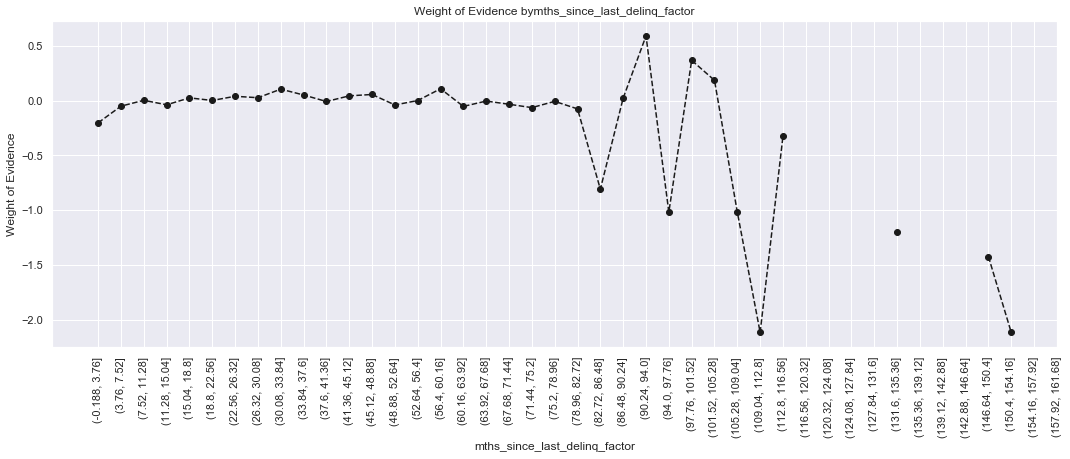

In [339]:
plot_by_woe(df_temp, 90)

Weight of evidence for the first category is considerably lower than the next one. So that can be a separate category (0-3]. The next jumps in WoE happen around 30 an then 56. The values after 56 have very few observations in each bin and hence can be combined together. 

In [340]:
for dataset in data_cleaner: 
    dataset['mths_since_last_delinq:Missing'] = np.where((dataset['mths_since_last_delinq'].isnull()), 1, 0)
    dataset['mths_since_last_delinq:0-3'] = np.where((dataset['mths_since_last_delinq'] >= 0) & (dataset['mths_since_last_delinq'] <= 3), 1, 0)
    dataset['mths_since_last_delinq:4-30'] = np.where((dataset['mths_since_last_delinq'] >= 4) & (dataset['mths_since_last_delinq'] <= 30), 1, 0)
    dataset['mths_since_last_delinq:31-56'] = np.where((dataset['mths_since_last_delinq'] >= 31) & (dataset['mths_since_last_delinq'] <= 56), 1, 0)
    dataset['mths_since_last_delinq:>=57'] = np.where((dataset['mths_since_last_delinq'] >= 57), 1, 0)

#### Debt to income ratio

In [341]:
loan_data_inputs_train['dti'].unique()

array([21.91,  7.49, 14.83, ..., 37.17, 38.85, 37.99])

In [342]:
loan_data_inputs_train['dti'].max()

39.99

In [343]:
# dti
loan_data_inputs_train['dti_factor'] = pd.cut(loan_data_inputs_train['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(loan_data_inputs_train, 'dti_factor', loan_data_targets_train)
# We calculate weight of evidence.
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.8]",1553,0.898905,0.004163,1396.0,157.0,0.004202,0.003850,0.087376,NaN,NaN,0.026725
1,"(0.8, 1.6]",1965,0.896692,0.005268,1762.0,203.0,0.005303,0.004978,0.063254,0.002213,0.024122,0.026725
2,"(1.6, 2.399]",2509,0.910323,0.006726,2284.0,225.0,0.006874,0.005518,0.219838,0.013631,0.156584,0.026725
3,"(2.399, 3.199]",3234,0.910019,0.008670,2943.0,291.0,0.008858,0.007136,0.216117,0.000304,0.003722,0.026725
4,"(3.199, 3.999]",4124,0.907856,0.011055,3744.0,380.0,0.011269,0.009319,0.189994,0.002162,0.026123,0.026725
5,"(3.999, 4.799]",5037,0.917213,0.013503,4620.0,417.0,0.013905,0.010226,0.307319,0.009356,0.117325,0.026725
6,"(4.799, 5.599]",5989,0.911671,0.016055,5460.0,529.0,0.016433,0.012973,0.236471,0.005541,0.070848,0.026725
7,"(5.599, 6.398]",6781,0.914909,0.018178,6204.0,577.0,0.018673,0.014150,0.277362,0.003238,0.040892,0.026725
8,"(6.398, 7.198]",7665,0.913372,0.020548,7001.0,664.0,0.021071,0.016283,0.257781,0.001537,0.019581,0.026725
9,"(7.198, 7.998]",8747,0.915514,0.023449,8008.0,739.0,0.024102,0.018123,0.285153,0.002141,0.027372,0.026725


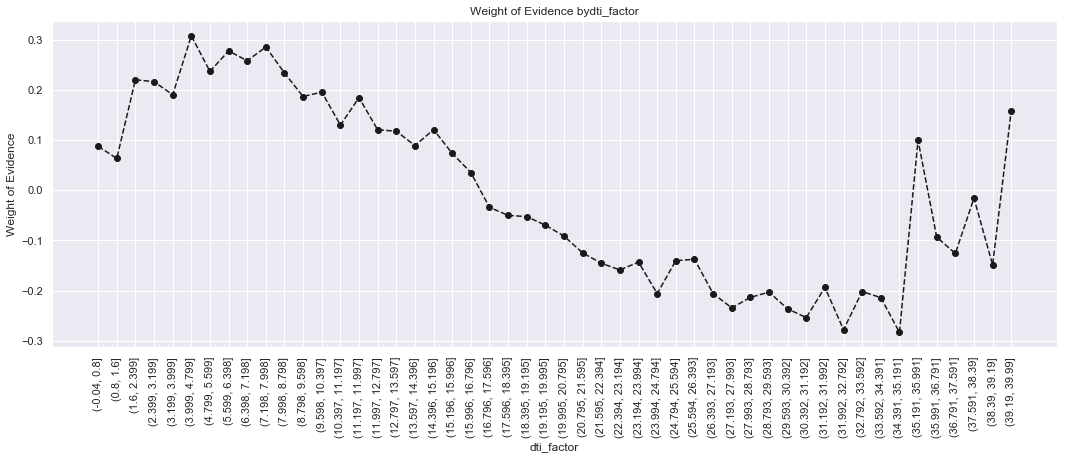

In [344]:
plot_by_woe(df_temp, 90)

The variable has a largely downward trend around WoE. But there are very few values greater than 35.

In [345]:
loan_data_inputs_train_temp = loan_data_inputs_train.loc[loan_data_inputs_train['dti'] <= 35, : ]

In [346]:
loan_data_inputs_train_temp['dti_factor'] = pd.cut(loan_data_inputs_train_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'dti_factor',
                                 loan_data_targets_train[loan_data_inputs_train_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",1366,0.894583,0.003690,1222.0,144.0,0.003707,0.003560,0.040465,NaN,NaN,0.027289
1,"(0.7, 1.4]",1664,0.893029,0.004496,1486.0,178.0,0.004507,0.004400,0.024094,0.001554,0.016371,0.027289
2,"(1.4, 2.1]",1986,0.912890,0.005365,1813.0,173.0,0.005499,0.004276,0.251481,0.019861,0.227387,0.027289
3,"(2.1, 2.8]",2594,0.913261,0.007008,2369.0,225.0,0.007186,0.005562,0.256157,0.000371,0.004676,0.027289
4,"(2.8, 3.5]",3135,0.903030,0.008470,2831.0,304.0,0.008587,0.007515,0.133392,0.010231,0.122765,0.027289
5,"(3.5, 4.2]",3844,0.915713,0.010385,3520.0,324.0,0.010677,0.008009,0.287507,0.012682,0.154115,0.027289
6,"(4.2, 4.9]",4595,0.914037,0.012414,4200.0,395.0,0.012739,0.009764,0.265988,0.001676,0.021519,0.027289
7,"(4.9, 5.6]",5312,0.912651,0.014351,4848.0,464.0,0.014705,0.011470,0.248471,0.001386,0.017517,0.027289
8,"(5.6, 6.3]",5927,0.914797,0.016013,5422.0,505.0,0.016446,0.012483,0.275696,0.002146,0.027225,0.027289
9,"(6.3, 7.0]",6482,0.911601,0.017512,5909.0,573.0,0.017923,0.014164,0.235381,0.003195,0.040315,0.027289


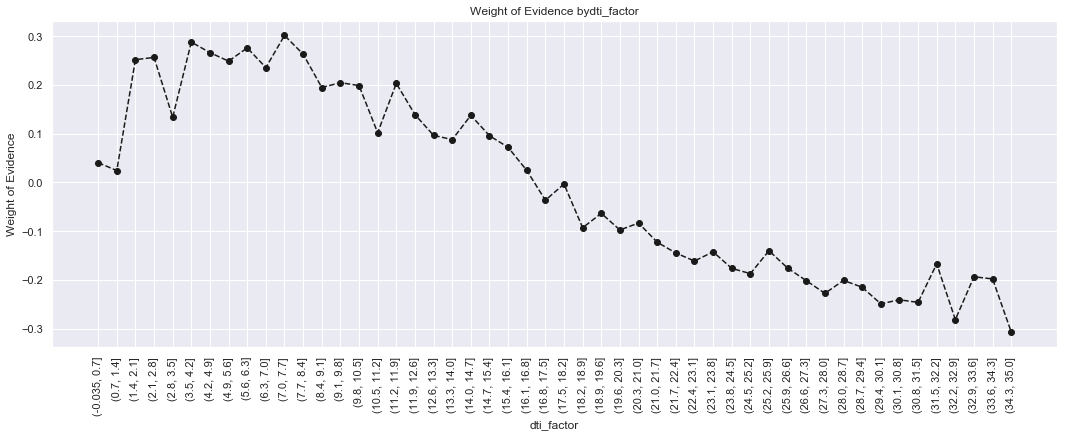

In [347]:
plot_by_woe(df_temp, 90)

In [348]:
for dataset in data_cleaner: 
    dataset['dti:<=1.4'] = np.where((dataset['dti'] <= 1.4), 1, 0)
    dataset['dti:1.4-3.5'] = np.where((dataset['dti'] > 1.4) & (dataset['dti'] <= 3.5), 1, 0)
    dataset['dti:3.5-7.7'] = np.where((dataset['dti'] > 3.5) & (dataset['dti'] <= 7.7), 1, 0)
    dataset['dti:7.7-10.5'] = np.where((dataset['dti'] > 7.7) & (dataset['dti'] <= 10.5), 1, 0)
    dataset['dti:10.5-16.1'] = np.where((dataset['dti'] > 10.5) & (dataset['dti'] <= 16.1), 1, 0)
    dataset['dti:16.1-20.3'] = np.where((dataset['dti'] > 16.1) & (dataset['dti'] <= 20.3), 1, 0)
    dataset['dti:20.3-21.7'] = np.where((dataset['dti'] > 20.3) & (dataset['dti'] <= 21.7), 1, 0)
    dataset['dti:21.7-22.4'] = np.where((dataset['dti'] > 21.7) & (dataset['dti'] <= 22.4), 1, 0)
    dataset['dti:22.4-35'] = np.where((dataset['dti'] > 22.4) & (dataset['dti'] <= 35), 1, 0)
    dataset['dti:>35'] = np.where((dataset['dti'] > 35), 1, 0)

#### mths_since_last_record

In [349]:
loan_data_inputs_train['mths_since_last_record'].unique()

array([ nan,  72.,  53., 105., 112.,  93.,  22.,  46.,  85.,  65.,  45.,
        96.,  64.,  34.,  89.,  42., 118.,  83.,  78.,  95., 108.,  62.,
       115.,   9.,  52.,  50., 113.,  76.,  20., 104., 111.,  29.,  66.,
        48.,  79.,  75.,  60.,  74.,  13.,  91.,   8., 117.,  82.,  15.,
        54.,  10.,  33.,  81., 103., 116., 109.,  63.,  68.,  28.,  94.,
       100.,  71.,  61.,  55.,   3.,  92.,  23., 106.,  16.,  67.,  58.,
       110.,   6.,   0.,  88.,  90., 102.,  31.,  69.,  36.,  49.,  99.,
        39.,  35.,  87.,  98.,  47., 107.,  14., 119., 114.,  51.,  86.,
        40.,  59.,  70.,  97.,  77., 101.,  38.,  56.,  73.,  57.,  80.,
        11.,  37.,  17.,  43.,  44.,  84.,  41.,  32.,  27.,  19.,  25.,
         7.,  18.,  26.,  24.,  30.,  12.,   5.,   4.,  21.,   1.,   2.,
       121., 120.])

This is variable with null values. 

In [350]:
loan_data_inputs_train_temp = loan_data_inputs_train[pd.notnull(loan_data_inputs_train['mths_since_last_record'])]
loan_data_inputs_train_temp['mths_since_last_record_factor'] = pd.cut(loan_data_inputs_train_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'mths_since_last_record_factor',
                                 loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.121, 2.42]",1086,0.764273,0.021691,830.0,256.0,0.018569,0.047672,-0.942830,NaN,NaN,0.080659
1,"(2.42, 4.84]",76,0.894737,0.001518,68.0,8.0,0.001521,0.001490,0.020988,0.130464,0.963818,0.080659
2,"(4.84, 7.26]",163,0.914110,0.003256,149.0,14.0,0.003334,0.002607,0.245810,0.019374,0.224823,0.080659
3,"(7.26, 9.68]",156,0.903846,0.003116,141.0,15.0,0.003155,0.002793,0.121631,0.010264,0.124179,0.080659
4,"(9.68, 12.1]",292,0.907534,0.005832,265.0,27.0,0.005929,0.005028,0.164814,0.003688,0.043183,0.080659
5,"(12.1, 14.52]",207,0.917874,0.004134,190.0,17.0,0.004251,0.003166,0.294732,0.010340,0.129918,0.080659
6,"(14.52, 16.94]",210,0.928571,0.004194,195.0,15.0,0.004363,0.002793,0.445871,0.010697,0.151139,0.080659
7,"(16.94, 19.36]",334,0.907186,0.006671,303.0,31.0,0.006779,0.005773,0.160667,0.021386,0.285204,0.080659
8,"(19.36, 21.78]",283,0.936396,0.005652,265.0,18.0,0.005929,0.003352,0.570280,0.029210,0.409612,0.080659
9,"(21.78, 24.2]",455,0.898901,0.009088,409.0,46.0,0.009151,0.008566,0.065995,0.037495,0.504284,0.080659


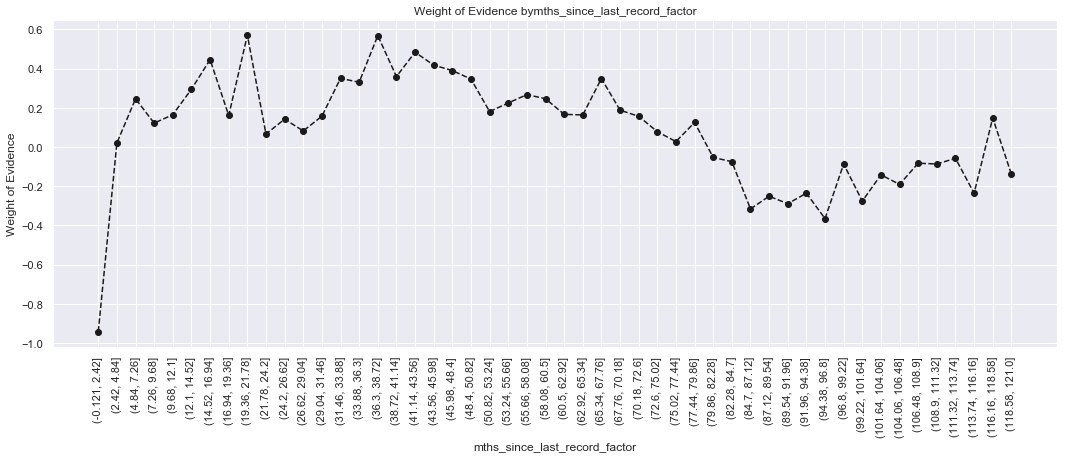

In [351]:
plot_by_woe(df_temp, 90)

In [352]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
for dataset in data_cleaner: 
    dataset['mths_since_last_record:Missing'] = np.where((dataset['mths_since_last_record'].isnull()), 1, 0)
    dataset['mths_since_last_record:0-2'] = np.where((dataset['mths_since_last_record'] >= 0) & (dataset['mths_since_last_record'] <= 2), 1, 0)
    dataset['mths_since_last_record:3-20'] = np.where((dataset['mths_since_last_record'] >= 3) & (dataset['mths_since_last_record'] <= 20), 1, 0)
    dataset['mths_since_last_record:21-31'] = np.where((dataset['mths_since_last_record'] >= 21) & (dataset['mths_since_last_record'] <= 31), 1, 0)
    dataset['mths_since_last_record:32-80'] = np.where((dataset['mths_since_last_record'] >= 32) & (dataset['mths_since_last_record'] <= 80), 1, 0)
    dataset['mths_since_last_record:81-86'] = np.where((dataset['mths_since_last_record'] >= 81) & (dataset['mths_since_last_record'] <= 86), 1, 0)
    dataset['mths_since_last_record:>86'] = np.where((dataset['mths_since_last_record'] > 86), 1, 0)

In [353]:
loan_data_inputs_train['mths_since_last_record:>86'].isnull().sum()


0

### Total Revolving Limit

In [354]:
loan_data_inputs_train['total_rev_hi_lim'].unique()

array([57000., 10000., 33300., ..., 96960., 60438., 24816.])

In [355]:
loan_data_inputs_train_temp = loan_data_inputs_train[pd.notnull(loan_data_inputs_train['total_rev_hi_lim'])]
loan_data_inputs_train_temp['total_rev_hi_lim_factor'] = pd.cut(loan_data_inputs_train_temp['total_rev_hi_lim'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'total_rev_hi_lim_factor',
                                 loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\pandas\core\algorithms.py:1823: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 199999.98]",371915,0.890496,0.997016,331189.0,40726.0,0.996807,0.998725,-0.001922,NaN,NaN,inf
1,"(199999.98, 399999.96]",996,0.952811,0.002670,949.0,47.0,0.002856,0.001153,0.907516,0.062315,0.909439,inf
2,"(399999.96, 599999.94]",83,0.975904,0.000223,81.0,2.0,0.000244,0.000049,1.603557,0.023092,0.696041,inf
3,"(599999.94, 799999.92]",22,0.909091,0.000059,20.0,2.0,0.000060,0.000049,0.204840,0.066813,1.398717,inf
4,"(799999.92, 999999.9]",5,1.000000,0.000013,5.0,0.0,0.000015,0.000000,inf,0.090909,inf,inf
5,"(999999.9, 1199999.88]",2,1.000000,0.000005,2.0,0.0,0.000006,0.000000,inf,0.000000,NaN,inf
6,"(1199999.88, 1399999.86]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
7,"(1399999.86, 1599999.84]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
8,"(1599999.84, 1799999.82]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
9,"(1799999.82, 1999999.8]",1,0.000000,0.000003,0.0,1.0,0.000000,0.000025,-inf,NaN,NaN,inf


This 99% of observations lie in the first bin, we need to dissect this into further bins to calculate WoE. 

In [356]:
loan_data_inputs_train_temp = loan_data_inputs_train.loc[loan_data_inputs_train['total_rev_hi_lim'] <= 200000, : ]
loan_data_inputs_train_temp['total_rev_hi_lim_factor'] = pd.cut(loan_data_inputs_train_temp['total_rev_hi_lim'], 50)
df_temp = woe_ordered_continuous(loan_data_inputs_train_temp, 'total_rev_hi_lim_factor',
                                 loan_data_targets_train[loan_data_inputs_train_temp.index])
df_temp

C:\Users\DevanshiKulshreshtha\AppData\Local\Programs\Python\Python37\Lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-200.0, 4000.0]",13877,0.862146,0.037312,11964.0,1913.0,0.036124,0.046972,-0.262602,NaN,NaN,0.044311
1,"(4000.0, 8000.0]",38926,0.874608,0.104663,34045.0,4881.0,0.102795,0.119850,-0.153498,0.012462,0.109104,0.044311
2,"(8000.0, 12000.0]",47936,0.878797,0.128889,42126.0,5810.0,0.127195,0.142661,-0.114747,0.004188,0.038751,0.044311
3,"(12000.0, 16000.0]",45306,0.877963,0.121817,39777.0,5529.0,0.120103,0.135761,-0.122550,0.000834,0.007803,0.044311
4,"(16000.0, 20000.0]",40142,0.879254,0.107932,35295.0,4847.0,0.106570,0.119015,-0.110450,0.001290,0.012099,0.044311
5,"(20000.0, 24000.0]",32242,0.887290,0.086691,28608.0,3634.0,0.086379,0.089230,-0.032479,0.008036,0.077971,0.044311
6,"(24000.0, 28000.0]",27832,0.887575,0.074834,24703.0,3129.0,0.074588,0.076831,-0.029620,0.000286,0.002859,0.044311
7,"(28000.0, 32000.0]",21855,0.893892,0.058763,19536.0,2319.0,0.058987,0.056942,0.035291,0.006316,0.064912,0.044311
8,"(32000.0, 36000.0]",18791,0.892821,0.050525,16777.0,2014.0,0.050656,0.049452,0.024055,0.001071,0.011237,0.044311
9,"(36000.0, 40000.0]",14498,0.912471,0.038982,13229.0,1269.0,0.039944,0.031159,0.248351,0.019650,0.224296,0.044311


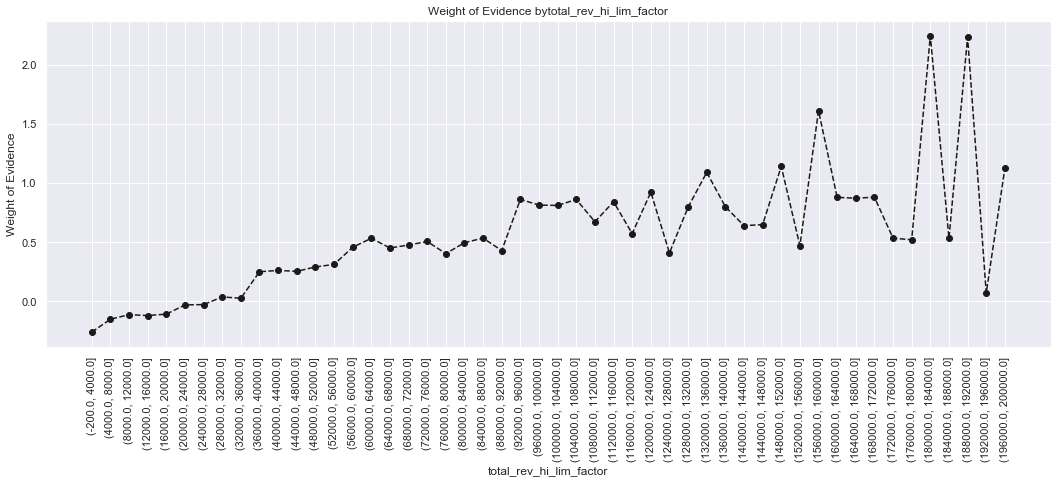

In [357]:
plot_by_woe(df_temp, 90)

In [358]:
for dataset in data_cleaner:
    dataset['total_rev_hi_lim:Missing'] = np.where((dataset['total_rev_hi_lim'].isnull()), 1, 0)
    dataset['total_rev_hi_lim:<=5K'] = np.where((dataset['total_rev_hi_lim'] <= 5000), 1, 0)
    dataset['total_rev_hi_lim:5K-10K'] = np.where((dataset['total_rev_hi_lim'] > 5000) & (dataset['total_rev_hi_lim'] <= 10000), 1, 0)
    dataset['total_rev_hi_lim:10K-20K'] = np.where((dataset['total_rev_hi_lim'] > 10000) & (dataset['total_rev_hi_lim'] <= 20000), 1, 0)
    dataset['total_rev_hi_lim:20K-30K'] = np.where((dataset['total_rev_hi_lim'] > 20000) & (dataset['total_rev_hi_lim'] <= 30000), 1, 0)
    dataset['total_rev_hi_lim:30K-40K'] = np.where((dataset['total_rev_hi_lim'] > 30000) & (dataset['total_rev_hi_lim'] <= 40000), 1, 0)
    dataset['total_rev_hi_lim:40K-55K'] = np.where((dataset['total_rev_hi_lim'] > 40000) & (dataset['total_rev_hi_lim'] <= 55000), 1, 0)
    dataset['total_rev_hi_lim:55K-95K'] = np.where((dataset['total_rev_hi_lim'] > 55000) & (dataset['total_rev_hi_lim'] <= 95000), 1, 0)
    dataset['total_rev_hi_lim:>95K'] = np.where((dataset['total_rev_hi_lim'] > 95000), 1, 0)
            
             

## Saving Output

In [ ]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')